In [245]:
# import required package for data handling and analyzation
import pandas as pd
import numpy as np
import re
import statsmodels.api as sm
from scipy import stats
import matplotlib as plt
import matplotlib.pyplot as pl
import seaborn as sns
#import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import preprocessing

#import `logistic regression` model
from sklearn.linear_model import LogisticRegression
#import mlxtend
#import pandas_profiling
#import plotly.plotly as py
#import cufflinks
#cufflinks.go_offline(connected=True)
#init_notebook_mode(connected=True)

In [246]:
#initial importing of the raw data to be cleaned
# add code to remove the -1 and the error SIC numbers
df = pd.read_excel('Competition1_raw_data.xlsx',na_values=r'-')

In [247]:
#taking a look at the data to see if there are any visible errors
#10 shows "-" as blank values
df.head(15)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0
5,ACOM,Ancestry.com Inc.,7379,13.5,14.5,12.5,14.200000,94.0,1.0,0.06,...,7407407.0,197.591,510.0,17999.0,13934.0,328.0,815.0,62.0,96.0,181.0
6,ACOR,ACORDA THERAPEUTICS INC,2836,6.0,13.0,11.0,6.720000,128.0,1.0,-1.87,...,5500000.0,5.146,495.0,15758.0,13953.0,379.0,698.0,82.0,106.0,135.0
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5.0,14.0,12.0,4.550000,91.0,0.0,-0.74,...,8000000.0,NaN,334.0,11226.0,10056.0,276.0,-1.0,55.0,120.0,122.0
8,ACTV,ACTIVE NETWORK INC,7372,15.0,18.0,16.0,15.900000,100.0,1.0,-0.51,...,11000000.0,279.600,620.0,14813.0,13463.0,335.0,917.0,58.0,124.0,234.0
9,ACW,ACCURIDE CORP,3714,9.0,19.0,17.0,0.000000,106.0,1.0,1.49,...,11000000.0,494.008,385.0,9134.0,8107.0,198.0,459.0,81.0,90.0,147.0


In [248]:
df.info() # getting more info on the data
#df.describe() #not needed at the moment because all types are objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         674 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null float64
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
dtypes: float64(19), object(3)
memory usage: 117.3+ KB


In [249]:
# Describe the Data - Exploratory Data Analysis
df.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,677.000000,672.000000,672.000000,660.000000,660.000000,660.000000,646.000000,660.000000,6.760000e+02,6.760000e+02,610.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,0.859091,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,6.053731,6.653429,5.835646,73.234948,152.817467,0.348192,162.666532,0.033318,1.043764e+08,2.512855e+07,1648.337634,175.741647,5449.644597,4839.670179,121.532637,472.914323,39.096525,84.828959,69.276285
min,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,10.000000,12.500000,11.000000,11.000000,85.000000,1.000000,-0.852500,-0.013927,1.871417e+07,5.000000e+06,37.245750,351.000000,9195.000000,8162.000000,213.000000,462.000000,45.000000,73.000000,100.000000
50%,13.500000,15.000000,13.000000,14.845000,107.000000,1.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12045.000000,10785.000000,279.000000,624.000000,60.000000,100.000000,134.000000
75%,17.000000,17.000000,15.000000,20.485000,155.250000,1.000000,0.470000,0.031571,4.980786e+07,1.200000e+07,331.138000,551.000000,15241.000000,13760.000000,354.000000,795.000000,85.000000,142.000000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,1.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.000000,883.000000


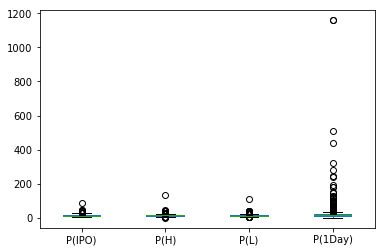

In [250]:
# Add Box Plots to further Describe the Data - for the Ps
df_p=df.iloc[:,3:7]
df_p.plot.box()

In [251]:
#Interpretation of above: All P variables are positively skewed, particularly P(1Day).

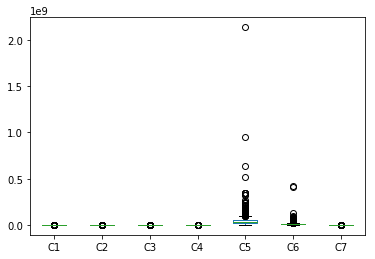

In [252]:
# Add Box Plots to further Describe the Data - for the Cs
df_p2=df.iloc[:,7:14]
df_p2.plot.box()

In [253]:
#Interpretation of above: All C variables are positively skewed, particularly C5.

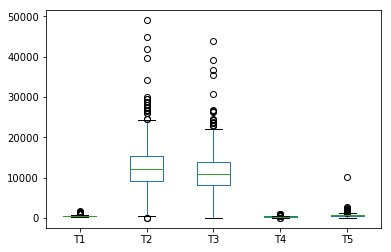

In [254]:
# Add Box Plots to further Describe the Data - for the Ts
df_p3=df.iloc[:,14:19]
df_p3.plot.box()

In [255]:
#Interpretation of above: All T variables are positively skewed, particularly T2 & T3.

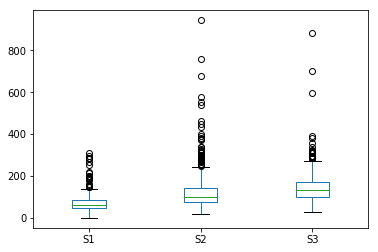

In [256]:
# Add Box Plots to further Describe the Data - for the Ss
df_p4=df.iloc[:,19:22]
df_p4.plot.box()

In [257]:
#Interpretation of above: All S variables are positively skewed.

In [258]:
df_copy = df.copy() # making a copy of the dataframe to preserve the original data

In [259]:
#Change the data types
df_copy.iloc[:,3:8].astype(float)
df_copy.iloc[:,9:].astype(float)
df_copy['C2'] = df_copy['C2'].astype('category')
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         674 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null category
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
dtypes: category(1), float64(18), object(3)
memory usage: 112.8+ KB


In [260]:
#Addressing negative ones found in the data
df_copy.iloc[[7,134],[18,19]]

,T5,S1
7,-1.0,55.0
134,643.0,-1.0


In [261]:
#Replace negative ones in the data with "Nan"
df_copy.iloc[7,18] = float('Nan')
df_copy.iloc[134,19] = float('Nan')
df_copy.iloc[[7,134],[18,19]]

,T5,S1
7,NaN,55.0
134,643.0,NaN


In [262]:
#Addressing the zeros found in columns T2 (Note: no zeros in T1)
df_copy.iloc[[125,199],[15]]

,T2
125,0.0
199,0.0


In [263]:
#Replace zeros in the data with "Nan"
df_copy.iloc[125,15] = float('Nan')
df_copy.iloc[199,15] = float('Nan')
df_copy.iloc[[125,199],[15]]

,T2
125,NaN
199,NaN


In [264]:
#Print list of entries with improper SIC codes
df_copy.iloc[[10,86,268,330,400,490,597,614,118,174,181,187,221,246,499,620],[0,1,2]]

,I1,I2,I3
10,ADKU,"ADCARE HEALTH SYSTEMS, INC",NaN
86,BLT,BLOUNT INTERNATIONAL INC,NaN
268,GSL,GLOBAL SIGNAL INC,NaN
330,KFI,KKR Financial Holdings LLC,NaN
400,NAUH,"National American University Holdings, Inc.",NaN
490,RCH,"CHINA CGAME, INC.",NaN
597,TRMM,"Access to Money, Inc.",NaN
614,TZOO,TRAVELZOO INC,NaN
118,CERE,"Ceres, Inc.",100
174,DLB,"Dolby Laboratories, Inc.","6794, 3861, 3663, 7819"


In [265]:
#SIC 1191 should be 0191 and 1783 should be 0783 change later to deal with beginning zero.
#Also add code to bin the SIC code into text via dictionary (i.e., name of SIC Code category)
missing_I3 = ['8051','5122','6798','6199','8221','3200','6099','4724','5261','7812','1191','1783','7389','7389','3663','5065']

In [266]:
#Replace improper SIC codes with values ascertained via independent research
df_copy.iloc[[10,86,268,330,400,490,597,614,118,174,181,187,221,246,499,620],2] = missing_I3
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         682 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null category
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         679 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         680 non-null float64
S1         680 non-null float64
S2         681 non-null float64
S3         681 non-null float64
dtypes: category(1), float64(18), object(3)
memory usage: 112.8+ KB


# Imputation Code

### Include a column to determine if the row needs imputing to keep track of changes by row


In [267]:
#df_mean = df_copy.fillna(df_copy.mean())
#df_median = df_copy.fillna(df_copy.median())
#df_mode = df_copy.fillna(df_copy.mode[0](dropna=True,numeric_only=True))

In [268]:
#df_median['C4'].head(25)

In [269]:
# Dawn's code
#Since none of the values are 100% normal, I think we should use the median value (vs. mean)
#when imputing missing values for continuous variables (i.e., all but C2);
#for the categorical variable (C2), we should use the mode.

#fist make a copy of the dataframe to preserve the original data
df_impute_copy = df_copy.copy()

#Start with C2 - by determining the mode
df_impute_copy['C2'].mode()

#Since none of the values are 100% normal, I think we should use the median value (vs. mean)
#when imputing missing values for continuous variables (i.e., all but C2);
#for the categorical variable (C2), we should use the mode.
# Include a column to determine if the row needs imputing to keep track of changes by row

#then impute median for P(IPO), P(H), P(L), P(1Day)
df_impute_copy['P(IPO)'].fillna(df_impute_copy['P(IPO)'].median(), inplace=True)
df_impute_copy['P(H)'].fillna(df_impute_copy['P(H)'].median(), inplace=True)
df_impute_copy['P(L)'].fillna(df_impute_copy['P(L)'].median(), inplace=True)
df_impute_copy['P(1Day)'].fillna(df_impute_copy['P(1Day)'].median(), inplace=True)

#now impute median for C1, C3, C4, C5, C6, C7
df_impute_copy['C1'].fillna(df_impute_copy['C1'].median(), inplace=True)
df_impute_copy['C3'].fillna(df_impute_copy['C3'].median(), inplace=True)
df_impute_copy['C4'].fillna(df_impute_copy['C4'].median(), inplace=True)
df_impute_copy['C5'].fillna(df_impute_copy['C5'].median(), inplace=True)
df_impute_copy['C6'].fillna(df_impute_copy['C6'].median(), inplace=True)
df_impute_copy['C7'].fillna(df_impute_copy['C7'].median(), inplace=True)

#now impute mode for C2...using the mode determined above (i.e., the series above with one number in it)
#df_impute_copy['C2'].fillna(1.0, inplace=True)
df_impute_copy['C2'].fillna(df_impute_copy['C2'].mode()[0],inplace=True)

#now impute median for T1, T2, T3, T4, T5
df_impute_copy['T1'].fillna(df_impute_copy['T1'].median(), inplace=True)
df_impute_copy['T2'].fillna(df_impute_copy['T2'].median(), inplace=True)
df_impute_copy['T3'].fillna(df_impute_copy['T3'].median(), inplace=True)
df_impute_copy['T4'].fillna(df_impute_copy['T4'].median(), inplace=True)
df_impute_copy['T5'].fillna(df_impute_copy['T5'].median(), inplace=True)

#now impute median for S1, S2, S3
df_impute_copy['S1'].fillna(df_impute_copy['S1'].median(), inplace=True)
df_impute_copy['S2'].fillna(df_impute_copy['S2'].median(), inplace=True)
df_impute_copy['S3'].fillna(df_impute_copy['S3'].median(), inplace=True)

#check work
df_impute_copy.head(15)

#Double-checking via "describe" - all imputation done except for C2
df_impute_copy.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,6.820000e+02,6.820000e+02,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.00000,682.000000
mean,13.835191,15.474135,13.507493,25.577032,148.350440,1.695003,0.007342,4.916458e+07,1.237106e+07,458.587321,465.602639,12792.900293,11394.948680,294.331378,680.057185,68.498534,120.07478,144.743402
std,6.031536,6.604652,5.792972,72.068973,150.518513,158.309101,0.032777,1.039359e+08,2.502200e+07,1563.531760,175.614521,5401.665364,4836.172083,121.444797,471.856119,38.979729,84.77015,69.226629
min,3.000000,0.000000,3.000000,0.000000,10.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,527.000000,0.000000,0.000000,167.000000,5.000000,20.00000,26.000000
25%,10.000000,13.000000,11.000000,11.092500,85.000000,-0.750000,-0.013352,1.874682e+07,5.004180e+06,41.511500,351.250000,9213.250000,8168.000000,213.250000,463.250000,45.000000,73.00000,100.000000
50%,13.500000,15.000000,13.000000,14.845000,107.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12049.000000,10785.000000,279.000000,624.500000,60.000000,100.00000,134.000000
75%,17.000000,17.000000,15.000000,20.087500,152.750000,0.440000,0.030941,4.936364e+07,1.193426e+07,289.758000,550.750000,15240.250000,13751.500000,353.750000,794.500000,84.750000,141.75000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.00000,883.000000


In [270]:
df_impute_copy.isnull().sum()

I1         0
I2         0
I3         0
P(IPO)     0
P(H)       0
P(L)       0
P(1Day)    0
C1         0
C2         0
C3         0
C4         0
C5         0
C6         0
C7         0
T1         0
T2         0
T3         0
T4         0
T5         0
S1         0
S2         0
S3         0
dtype: int64

In [271]:
#Add calculated fields

#Create P(mid) variable
df_impute_copy['P(mid)'] = (df_impute_copy['P(H)'] + df_impute_copy['P(L)']) / 2

#Create variable true_value for C6P
true_value = ((df_impute_copy['P(IPO)'] - df_impute_copy['P(mid)']) / df_impute_copy['P(mid)'])*100

# Add T1'=T4/T1 & S1'=S1/T2 Calcualte all the ratios for the Ts & S Colums
df_impute_copy['Long_to_Total_Sentences'] = df_impute_copy['T4'] / df_impute_copy['T1']
df_impute_copy['Pos_to_Total_Words'] = df_impute_copy['S1'] / df_impute_copy['T2']
df_impute_copy['Neg_to_Total_Words'] = df_impute_copy['S2'] / df_impute_copy['T2']
df_impute_copy['Uncertain_to_Total_Words'] = df_impute_copy['S3'] / df_impute_copy['T2']
df_impute_copy['Pos_Neg_Words'] = df_impute_copy['S1'] / df_impute_copy['S2']
df_impute_copy['Uncertain_to_Pos_Words'] = df_impute_copy['S3'] / df_impute_copy['S1']
df_impute_copy['Uncertain_to_Neg_Words'] = df_impute_copy['S3'] / df_impute_copy['S2']
df_impute_copy['Real_to_Total_Words'] = df_impute_copy['T3'] / df_impute_copy['T2']
df_impute_copy['Long_to_Total_Words'] = df_impute_copy['T5'] / df_impute_copy['T2']

#Create new columns for "prime" variables
#Add them to df_impute_copy
df_impute_copy['C3P'] = np.where(df_impute_copy['C3'] > 0, '1', '0')
df_impute_copy['C5P'] = df_impute_copy['C5'] / df_impute_copy['C6']
df_impute_copy['C6P'] = np.where(df_impute_copy['P(IPO)'] > df_impute_copy['P(mid)'], true_value, '0')
df_impute_copy['Y1'] = np.where(df_impute_copy['P(IPO)'] < df_impute_copy['P(mid)'], '1', '0')
df_impute_copy['Y2'] = np.where(df_impute_copy['P(IPO)'] < df_impute_copy['P(1Day)'], '1', '0')



#if df_alt_copy['P(IPO)'] > df_alt_copy['P(mid)']:
    #df_alt_copy['C6P'] = ((df_alt_copy['P(IPO)'] - df_alt_copy['P(mid)']) / df_alt_copy['P(mid)'])*100 
#else :
    #df_alt_copy['C6P'] = 0

df_impute_copy.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,Pos_Neg_Words,Uncertain_to_Pos_Words,Uncertain_to_Neg_Words,Real_to_Total_Words,Long_to_Total_Words,C3P,C5P,C6P,Y1,Y2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,0.529915,2.241935,1.188034,0.908876,0.054250,1,3.864345,11.11111111111111,0,1
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,0.293388,3.338028,0.979339,0.898724,0.051395,0,12.028832,0,1,0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,1.848485,0.983607,1.818182,0.909350,0.061764,0,3.369134,0,1,0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,1.355932,1.375000,1.864407,0.917060,0.061630,0,3.299697,0,1,1
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,0.449664,2.492537,1.120805,0.888469,0.048550,1,3.726269,5.0,0,1


In [272]:
df_impute_copy[['C6P','I3','C3P']] = df_impute_copy[['C6P','I3','C3P']].astype('float')
df_impute_copy.dtypes

I1                            object
I2                            object
I3                           float64
P(IPO)                       float64
P(H)                         float64
P(L)                         float64
P(1Day)                      float64
C1                           float64
C2                          category
C3                           float64
C4                           float64
C5                           float64
C6                           float64
C7                           float64
T1                           float64
T2                           float64
T3                           float64
T4                           float64
T5                           float64
S1                           float64
S2                           float64
S3                           float64
P(mid)                       float64
Long_to_Total_Sentences      float64
Pos_to_Total_Words           float64
Neg_to_Total_Words           float64
Uncertain_to_Total_Words     float64
P

## Subsetting the data into separate dataframes: continuous, non-continuous, evaluation list

In [273]:
# creating a list of the continuous columns that may need to be normalized.

categorical_list = df_impute_copy.columns.tolist() # This includes C2, I1, I2, and I3...
del categorical_list[9:-2]
del categorical_list[3:8]
categorical_list = ['C2','I1', 'I2', 'I3', 'Y1', 'Y2']
print(categorical_list)

col_list = df_impute_copy.columns.tolist() # This excludes C2, I1, I2, and I3...NEED TO EXCLUDE THE CATEGORICALS FROM HERE
del col_list[0:4]
del col_list[4]
print(col_list)

# Create a list of columns to use in the evaluation code baseline
eval_list = df_impute_copy.columns.tolist()
del eval_list[0:7]
del eval_list[1]
del eval_list[6:14]
print(eval_list)


['C2', 'I1', 'I2', 'I3', 'Y1', 'Y2']
['P(H)', 'P(L)', 'P(1Day)', 'C1', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3', 'P(mid)', 'Long_to_Total_Sentences', 'Pos_to_Total_Words', 'Neg_to_Total_Words', 'Uncertain_to_Total_Words', 'Pos_Neg_Words', 'Uncertain_to_Pos_Words', 'Uncertain_to_Neg_Words', 'Real_to_Total_Words', 'Long_to_Total_Words', 'C3P', 'C5P', 'C6P', 'Y1', 'Y2']
['C1', 'C3', 'C4', 'C5', 'C6', 'C7', 'P(mid)', 'Long_to_Total_Sentences', 'Pos_to_Total_Words', 'Neg_to_Total_Words', 'Uncertain_to_Total_Words', 'Pos_Neg_Words', 'Uncertain_to_Pos_Words', 'Uncertain_to_Neg_Words', 'Real_to_Total_Words', 'Long_to_Total_Words', 'C3P', 'C5P', 'C6P', 'Y1', 'Y2']


In [274]:
df_impute_copy.dtypes

I1                            object
I2                            object
I3                           float64
P(IPO)                       float64
P(H)                         float64
P(L)                         float64
P(1Day)                      float64
C1                           float64
C2                          category
C3                           float64
C4                           float64
C5                           float64
C6                           float64
C7                           float64
T1                           float64
T2                           float64
T3                           float64
T4                           float64
T5                           float64
S1                           float64
S2                           float64
S3                           float64
P(mid)                       float64
Long_to_Total_Sentences      float64
Pos_to_Total_Words           float64
Neg_to_Total_Words           float64
Uncertain_to_Total_Words     float64
P

# Visualization of the data

In [275]:
df_continuous = df_impute_copy.loc[:,eval_list]

In [276]:
# #NOTE: NEED TO REDO RANGE FOR ADDED COLUMNS
# p_df = df_continuous.iloc[:,:3].dropna()
# sns.pairplot(p_df, dropna =False)
# c_df = df_continuous.iloc[:,3:10].dropna()
# sns.pairplot(c_df, dropna =False)
# t_df = df_continuous.iloc[:,10:15].dropna()
# sns.pairplot(t_df, dropna =False)
# s_df = df_continuous.iloc[:,15:19].dropna()
# sns.pairplot(s_df, dropna =False)
# calc_df = df_continuous.iloc[:,19:25].dropna()
# sns.pairplot(calc_df, dropna =False)
# calc2_df = df_continuous.iloc[:,25:].dropna()
# sns.pairplot(calc2_df, dropna =False)


In [277]:
#Check skewness again
eval_list
df_continuous.skew()

C1                           5.747573
C3                          21.158769
C4                          -0.491134
C5                          13.659056
C6                          12.613291
C7                          12.348960
P(mid)                       8.292727
Long_to_Total_Sentences      0.080198
Pos_to_Total_Words          20.997011
Neg_to_Total_Words          10.311764
Uncertain_to_Total_Words    22.205613
Pos_Neg_Words                1.809010
Uncertain_to_Pos_Words       1.568628
Uncertain_to_Neg_Words       1.236902
Real_to_Total_Words         25.575293
Long_to_Total_Words         26.111496
C3P                         -0.117764
C5P                         10.648354
C6P                          4.396060
Y1                          -0.052921
Y2                          -0.894757
dtype: float64

In [278]:
#Interpretation: All but C4 & Long_to_Total_Sentences and C3P are outside of the "acceptable" range of -1 to +1

In [279]:
df_eval_base = df_impute_copy[eval_list]
df_eval_base.iloc[:,:].astype(float)

,C1,C3,C4,C5,C6,C7,P(mid),Long_to_Total_Sentences,Pos_to_Total_Words,Neg_to_Total_Words,...,Pos_Neg_Words,Uncertain_to_Pos_Words,Uncertain_to_Neg_Words,Real_to_Total_Words,Long_to_Total_Words,C3P,C5P,C6P,Y1,Y2
0,122.0,3.43,0.029074,40962052.0,10600000.0,51.345,9.0,0.640426,0.004875,0.009199,...,0.529915,2.241935,1.188034,0.908876,0.054250,1.0,3.864345,11.111111,0.0,1.0
1,259.0,-1.62,-0.013352,28869196.0,2400000.0,25.936,9.0,0.644753,0.003258,0.011105,...,0.293388,3.338028,0.979339,0.898724,0.051395,0.0,12.028832,0.000000,1.0,0.0
2,90.0,-1.24,0.020715,16845668.0,5000000.0,7.378,13.0,0.636816,0.011593,0.006271,...,1.848485,0.983607,1.818182,0.909350,0.061764,0.0,3.369134,0.000000,1.0,0.0
3,209.0,-0.91,0.020023,14848637.0,4500000.0,8.526,15.0,0.539634,0.009686,0.007144,...,1.355932,1.375000,1.864407,0.917060,0.061630,0.0,3.299697,0.000000,1.0,1.0
4,80.0,0.07,-0.034895,30741716.0,8250000.0,632.298,20.0,0.587413,0.004518,0.010047,...,0.449664,2.492537,1.120805,0.888469,0.048550,1.0,3.726269,5.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,317.0,-0.37,0.004670,38386565.0,9684109.0,186.101,15.0,0.612663,0.006512,0.007935,...,0.820755,1.988506,1.632075,0.920952,0.050603,0.0,3.963872,20.000000,0.0,1.0
678,98.0,-0.41,0.058689,32758082.0,7000000.0,25.461,15.0,0.647177,0.005069,0.009124,...,0.555556,2.471429,1.373016,0.906227,0.056770,0.0,4.679726,0.000000,1.0,1.0
679,112.0,0.60,0.030425,11479826.0,3125000.0,55.431,8.0,0.647761,0.004191,0.009044,...,0.463415,2.368421,1.097561,0.889600,0.047976,1.0,3.673544,0.000000,0.0,0.0
680,78.0,0.20,0.032284,13180261.0,3125000.0,117.857,16.0,0.710938,0.006773,0.005362,...,1.263158,2.083333,2.631579,0.909412,0.043178,1.0,4.217684,18.750000,0.0,0.0


In [280]:
df_eval_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 21 columns):
C1                          682 non-null float64
C3                          682 non-null float64
C4                          682 non-null float64
C5                          682 non-null float64
C6                          682 non-null float64
C7                          682 non-null float64
P(mid)                      682 non-null float64
Long_to_Total_Sentences     682 non-null float64
Pos_to_Total_Words          682 non-null float64
Neg_to_Total_Words          682 non-null float64
Uncertain_to_Total_Words    682 non-null float64
Pos_Neg_Words               682 non-null float64
Uncertain_to_Pos_Words      682 non-null float64
Uncertain_to_Neg_Words      682 non-null float64
Real_to_Total_Words         682 non-null float64
Long_to_Total_Words         682 non-null float64
C3P                         682 non-null float64
C5P                         682 non-null float64
C6P          

In [281]:
# create a subset of columns to normalize - dropping Y1, Y2 and C3
norm_sublist = df_eval_base.columns.tolist()
del norm_sublist[-2:]
del norm_sublist[1]
norm_sublist

['C1',
 'C4',
 'C5',
 'C6',
 'C7',
 'P(mid)',
 'Long_to_Total_Sentences',
 'Pos_to_Total_Words',
 'Neg_to_Total_Words',
 'Uncertain_to_Total_Words',
 'Pos_Neg_Words',
 'Uncertain_to_Pos_Words',
 'Uncertain_to_Neg_Words',
 'Real_to_Total_Words',
 'Long_to_Total_Words',
 'C3P',
 'C5P',
 'C6P']

In [282]:
# create a subset of columns to normalize - dropping C5, C6
del norm_sublist[2:4]
norm_sublist

['C1',
 'C4',
 'C7',
 'P(mid)',
 'Long_to_Total_Sentences',
 'Pos_to_Total_Words',
 'Neg_to_Total_Words',
 'Uncertain_to_Total_Words',
 'Pos_Neg_Words',
 'Uncertain_to_Pos_Words',
 'Uncertain_to_Neg_Words',
 'Real_to_Total_Words',
 'Long_to_Total_Words',
 'C3P',
 'C5P',
 'C6P']

In [283]:
# create a subset of columns to normalize - dropping P(mid)
del norm_sublist[3]
norm_sublist

['C1',
 'C4',
 'C7',
 'Long_to_Total_Sentences',
 'Pos_to_Total_Words',
 'Neg_to_Total_Words',
 'Uncertain_to_Total_Words',
 'Pos_Neg_Words',
 'Uncertain_to_Pos_Words',
 'Uncertain_to_Neg_Words',
 'Real_to_Total_Words',
 'Long_to_Total_Words',
 'C3P',
 'C5P',
 'C6P']

In [284]:
norm_df = df_eval_base.loc[:,norm_sublist]

In [285]:
#RUN EVALUATION CODE AND THAT ENDS "BEGINNING OF THE PIPELINE"
#df_eval_base.to_csv("evalbase.csv", index=False)

In [286]:
for feature in norm_sublist:
    #print (feature, "Shapiro test stat & p-value is",stats.shapiro(norm_df[feature]))
    print (feature, "skew is",norm_df[feature].skew())
    

C1 skew is 5.747573481594514
C4 skew is -0.491134301597051
C7 skew is 12.348960384656746
Long_to_Total_Sentences skew is 0.08019803376082925
Pos_to_Total_Words skew is 20.99701132387033
Neg_to_Total_Words skew is 10.311764261719535
Uncertain_to_Total_Words skew is 22.205613280000033
Pos_Neg_Words skew is 1.8090095495216123
Uncertain_to_Pos_Words skew is 1.5686283644269103
Uncertain_to_Neg_Words skew is 1.236901918266153
Real_to_Total_Words skew is 25.575293099915584
Long_to_Total_Words skew is 26.111496434722916
C3P skew is -0.1177635000217479
C5P skew is 10.648353522178487
C6P skew is 4.396059804276369


# STANDARDIZATION CODE FOR IQR

In [287]:
# sourced from - https://medium.com/@prashant.nair2050/hands-on-outlier-detection-and-treatment-in-python-using-1-5-iqr-rule-f9ff1961a414

def norm_df_outlier(datacolumn):
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    datacolumn[datacolumn>upper_range] = upper_range
    datacolumn[datacolumn<lower_range] = lower_range
    return datacolumn

In [288]:
normalized_df_copy = norm_df.copy()
normalized_df_copy.apply(norm_df_outlier)

,C1,C4,C7,Long_to_Total_Sentences,Pos_to_Total_Words,Neg_to_Total_Words,Uncertain_to_Total_Words,Pos_Neg_Words,Uncertain_to_Pos_Words,Uncertain_to_Neg_Words,Real_to_Total_Words,Long_to_Total_Words,C3P,C5P,C6P
0,122.000,0.029074,51.34500,0.640426,0.004875,0.009199,0.010929,0.529915,2.241935,1.188034,0.908876,0.054250,1.0,3.864345,11.111111
1,254.375,-0.013352,25.93600,0.644753,0.003258,0.011105,0.010876,0.293388,3.338028,0.979339,0.898724,0.051395,0.0,7.882541,0.000000
2,90.000,0.020715,7.37800,0.636816,0.009414,0.006271,0.011403,1.253040,0.983607,1.818182,0.909350,0.061764,0.0,3.369134,0.000000
3,209.000,0.020023,8.52600,0.539634,0.009414,0.007144,0.013319,1.253040,1.375000,1.864407,0.917060,0.061630,0.0,3.299697,0.000000
4,80.000,-0.034895,632.29800,0.587413,0.004518,0.010047,0.011261,0.449664,2.492537,1.120805,0.888469,0.048550,1.0,3.726269,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,254.375,0.004670,186.10100,0.612663,0.006512,0.007935,0.012950,0.820755,1.988506,1.632075,0.920952,0.050603,0.0,3.963872,17.857143
678,98.000,0.058689,25.46100,0.647177,0.005069,0.009124,0.012527,0.555556,2.471429,1.373016,0.906227,0.056770,0.0,4.679726,0.000000
679,112.000,0.030425,55.43100,0.647761,0.004191,0.009044,0.009926,0.463415,2.368421,1.097561,0.889600,0.047976,1.0,3.673544,0.000000
680,78.000,0.032284,117.85700,0.710938,0.006773,0.005362,0.014110,1.253040,2.083333,2.592898,0.909412,0.043178,1.0,4.217684,17.857143


In [289]:
for feature in normalized_df_copy.columns.to_list():
    #print (feature, "Shapiro test stat & p-value is",stats.shapiro(normalized_df_copy[feature]))
    print (feature, "skew is",normalized_df_copy[feature].skew())

C1 skew is 0.8264727924546521
C4 skew is -0.30863466620782026
C7 skew is 1.1767565949920686
Long_to_Total_Sentences skew is -0.06924971476926904
Pos_to_Total_Words skew is 0.600045989170772
Neg_to_Total_Words skew is 0.6819938798990469
Uncertain_to_Total_Words skew is 0.4835392181539412
Pos_Neg_Words skew is 0.7814459050043157
Uncertain_to_Pos_Words skew is 0.7131304622326831
Uncertain_to_Neg_Words skew is 0.6387625686592523
Real_to_Total_Words skew is -0.5183830416737012
Long_to_Total_Words skew is 0.13059229047859483
C3P skew is -0.1177635000217479
C5P skew is 0.7196222858732435
C6P skew is 1.169162263382948


In [290]:
#Conclusion: A bunch are still out of the acceptable range - so we have more work to do!


# MIN-MAX CODE

In [291]:
# MIN-MAX NORMALIZATION
# Code for min-max normalization found at Stackoverflow - see here:
# https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

x = normalized_df_copy.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
#normalized_df_copy = pd.DataFrame(x_scaled, columns= normalized_df_copy.columns.tolist())
normalized_df_copy = pd.DataFrame(x_scaled, columns= normalized_df_copy.columns)
normalized_df_copy

,C1,C4,C7,Long_to_Total_Sentences,Pos_to_Total_Words,Neg_to_Total_Words,Uncertain_to_Total_Words,Pos_Neg_Words,Uncertain_to_Pos_Words,Uncertain_to_Neg_Words,Real_to_Total_Words,Long_to_Total_Words,C3P,C5P,C6P
0,0.458312,0.630418,0.077442,0.534307,0.434365,0.516718,0.455963,0.354183,0.434831,0.389923,0.616847,0.564398,1.0,0.471242,0.622222
1,1.000000,0.384735,0.039063,0.545709,0.232925,0.656497,0.451801,0.142944,0.739759,0.299295,0.520101,0.485313,0.0,1.000000,0.000000
2,0.327366,0.582011,0.011032,0.524798,1.000000,0.302045,0.493203,1.000000,0.084768,0.663571,0.621360,0.772573,0.0,0.406077,0.000000
3,0.814322,0.578004,0.012766,0.268780,1.000000,0.366015,0.643764,1.000000,0.193653,0.683645,0.694835,0.768865,0.0,0.396940,0.000000
4,0.286445,0.259982,0.954944,0.394649,0.389912,0.578929,0.482081,0.282512,0.504547,0.360728,0.422374,0.406499,1.0,0.453073,0.280000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,1.000000,0.489094,0.280985,0.461169,0.638465,0.424020,0.614793,0.613930,0.364327,0.582753,0.731924,0.463360,0.0,0.484339,1.000000
678,0.360102,0.801912,0.038346,0.552094,0.458564,0.511217,0.581565,0.377083,0.498675,0.470253,0.591602,0.634239,0.0,0.578539,0.000000
679,0.417391,0.638242,0.083614,0.553632,0.349183,0.505348,0.377204,0.294793,0.470018,0.350634,0.433146,0.390595,1.0,0.446135,0.000000
680,0.278261,0.649007,0.177905,0.720065,0.670927,0.235355,0.705954,1.000000,0.390708,1.000000,0.621947,0.257653,1.0,0.517739,1.000000


In [292]:
# for feature in normalized_df_copy.columns.to_list():
#     #print (feature, "Shapiro test stat & p-value is",stats.shapiro(normalized_df_copy[feature]))
#     print (feature, "skew is",normalized_df_copy[feature].skew())

#Describe the df to make sure all numbers between 0 and 1
normalized_df_copy.describe()

,C1,C4,C7,Long_to_Total_Sentences,Pos_to_Total_Words,Neg_to_Total_Words,Uncertain_to_Total_Words,Pos_Neg_Words,Uncertain_to_Pos_Words,Uncertain_to_Neg_Words,Real_to_Total_Words,Long_to_Total_Words,C3P,C5P,C6P
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,0.473228,0.505588,0.307271,0.502970,0.487664,0.501351,0.496558,0.444518,0.460172,0.471954,0.480554,0.505729,0.529326,0.492001,0.233038
std,0.253023,0.186131,0.336886,0.185310,0.207176,0.201167,0.201676,0.226088,0.226335,0.207335,0.210244,0.189694,0.499506,0.218630,0.345367
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.306905,0.384735,0.062589,0.375000,0.344607,0.357779,0.349222,0.282806,0.294516,0.322277,0.375000,0.375000,0.000000,0.338217,0.000000
50%,0.396931,0.514892,0.156723,0.504247,0.457891,0.472312,0.485200,0.402259,0.423164,0.441468,0.504941,0.499096,1.000000,0.453700,0.000000
75%,0.584143,0.641226,0.437554,0.625000,0.606764,0.614668,0.609533,0.569684,0.576710,0.593366,0.625000,0.625000,1.000000,0.602930,0.400000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [293]:
# Conclusion: All variables now scaled to between 0 and 1.

# NORMALIZATION CODE

In [137]:
#Check on norm_sublist to ensure all columns are there
norm_sublist

['C1',
 'C4',
 'C7',
 'Long_to_Total_Sentences',
 'Pos_to_Total_Words',
 'Neg_to_Total_Words',
 'Uncertain_to_Total_Words',
 'Pos_Neg_Words',
 'Uncertain_to_Pos_Words',
 'Uncertain_to_Neg_Words',
 'Real_to_Total_Words',
 'Long_to_Total_Words',
 'C3P',
 'C5P',
 'C6P']

In [138]:
#Creating normalized columns for continuous features
for feature in norm_sublist:
    norm_name = feature + "_norm"
    if normalized_df_copy[feature].skew()>0.5:
        normalized_df_copy[norm_name] = np.cbrt(normalized_df_copy[feature])
    elif normalized_df_copy[feature].skew()<-0.5:
        normalized_df_copy[norm_name] = np.power(normalized_df_copy[feature],2)
    else: normalized_df_copy[norm_name] = normalized_df_copy[feature]

In [139]:
#Subsetting to retain just normalized columns
normalized_df = normalized_df_copy.iloc[:,15:]
normalized_df

,C1_norm,C4_norm,C7_norm,Long_to_Total_Sentences_norm,Pos_to_Total_Words_norm,Neg_to_Total_Words_norm,Uncertain_to_Total_Words_norm,Pos_Neg_Words_norm,Uncertain_to_Pos_Words_norm,Uncertain_to_Neg_Words_norm,Real_to_Total_Words_norm,Long_to_Total_Words_norm,C3P_norm,C5P_norm,C6P_norm
0,0.770999,0.630418,0.426245,0.534307,0.757330,0.802450,0.455963,0.707526,0.757600,0.730566,0.380501,0.564398,1.0,0.778183,0.853719
1,1.000000,0.384735,0.339304,0.545709,0.615279,0.869116,0.451801,0.522864,0.904406,0.668908,0.270505,0.485313,0.0,1.000000,0.000000
2,0.689199,0.582011,0.222616,0.524798,1.000000,0.670951,0.493203,1.000000,0.439283,0.872226,0.386089,0.772573,0.0,0.740519,0.000000
3,0.933825,0.578004,0.233716,0.268780,1.000000,0.715319,0.643764,1.000000,0.578550,0.880934,0.482796,0.768865,0.0,0.734923,0.000000
4,0.659195,0.259982,0.984750,0.394649,0.730559,0.833441,0.482081,0.656164,0.796099,0.711858,0.178400,0.406499,1.0,0.768050,0.654213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,1.000000,0.489094,0.654979,0.461169,0.861084,0.751269,0.614793,0.849910,0.714218,0.835272,0.535713,0.463360,0.0,0.785326,1.000000
678,0.711446,0.801912,0.337214,0.552094,0.771140,0.799592,0.581565,0.722457,0.792999,0.777638,0.349993,0.634239,0.0,0.833254,0.000000
679,0.747334,0.638242,0.437280,0.553632,0.704181,0.796520,0.377204,0.665537,0.777508,0.705155,0.187616,0.390595,1.0,0.764109,0.000000
680,0.652856,0.649007,0.562423,0.720065,0.875437,0.617411,0.705954,1.000000,0.731056,1.000000,0.386818,0.257653,1.0,0.802978,1.000000


In [140]:
#Assess skewness of normalized continuous variables
for feature in normalized_df.columns.to_list():
    #print (feature, "Shapiro test stat & p-value is",stats.shapiro(normalized_df[feature]))
    print (feature, "skew is",normalized_df[feature].skew())
    

C1_norm skew is -0.6739380238452145
C4_norm skew is -0.3086346662078202
C7_norm skew is 0.17651739543124165
Long_to_Total_Sentences_norm skew is -0.06924971476927116
Pos_to_Total_Words_norm skew is -0.6186639743047341
Neg_to_Total_Words_norm skew is -0.44904768987752686
Uncertain_to_Total_Words_norm skew is 0.4835392181539393
Pos_Neg_Words_norm skew is -0.2414523127105942
Uncertain_to_Pos_Words_norm skew is -0.30726845851720447
Uncertain_to_Neg_Words_norm skew is -0.47497483418375214
Real_to_Total_Words_norm skew is 0.7636623991681255
Long_to_Total_Words_norm skew is 0.13059229047859428
C3P_norm skew is -0.1177635000217479
C5P_norm skew is -0.5305397014595258
C6P_norm skew is 0.6392626201577396


In [141]:
#Conclusion - now only a few remain outside of the range of -.5 to +.5: c1_norm, Pos_to_Total_Words_norm, Real_to_Total_Words_norm, C5P_norm, and C6P_norm
#Note: All, however, are with the range of -1 to +1.

In [142]:
normalized_df.describe()

,C1_norm,C4_norm,C7_norm,Long_to_Total_Sentences_norm,Pos_to_Total_Words_norm,Neg_to_Total_Words_norm,Uncertain_to_Total_Words_norm,Pos_Neg_Words_norm,Uncertain_to_Pos_Words_norm,Uncertain_to_Neg_Words_norm,Real_to_Total_Words_norm,Long_to_Total_Words_norm,C3P_norm,C5P_norm,C6P_norm
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,0.751721,0.505588,0.575297,0.502970,0.769889,0.779661,0.496558,0.740283,0.750097,0.760676,0.275069,0.505729,0.529326,0.770940,0.311640
std,0.150063,0.186131,0.257062,0.185310,0.118440,0.109502,0.201676,0.133291,0.131455,0.119637,0.188647,0.189694,0.499506,0.122701,0.411814
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.674530,0.384735,0.397039,0.375000,0.701092,0.709913,0.349222,0.656391,0.665329,0.685609,0.140625,0.375000,0.000000,0.696731,0.000000
50%,0.734917,0.514892,0.539152,0.504247,0.770762,0.778771,0.485200,0.738191,0.750763,0.761436,0.254966,0.499096,1.000000,0.768404,0.000000
75%,0.835935,0.641226,0.759178,0.625000,0.846590,0.850250,0.609533,0.828979,0.832374,0.840313,0.390625,0.625000,1.000000,0.844803,0.736806
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Z- Score Code

In [146]:
# Z-SCORE STANDARDIZATION CODE from DAWN
#Here, I found code at Stackoverflow:
#https://stackoverflow.com/questions/50194821/why-normalization-using-z-score-in-pandas-dataframe-generates-nan-columns

#import numpy as np
#import pandas as pd
#from scipy import stats
from scipy.stats import zscore

#df = pd.DataFrame(pd.read_csv('dataset.csv', sep=','))
#df = df.dropna(how='any') # drop nan entries
#df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)] # remove outliers

#print(df.describe())
normalized_df_copy = normalized_df.apply(zscore) # Normalization
normalized_df_copy.describe()

,C1_norm,C4_norm,C7_norm,Long_to_Total_Sentences_norm,Pos_to_Total_Words_norm,Neg_to_Total_Words_norm,Uncertain_to_Total_Words_norm,Pos_Neg_Words_norm,Uncertain_to_Pos_Words_norm,Uncertain_to_Neg_Words_norm,Real_to_Total_Words_norm,Long_to_Total_Words_norm,C3P_norm,C5P_norm,C6P_norm
count,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,682.000000
mean,-1.002782e-16,2.344166e-17,1.393476e-16,-7.566447e-16,1.242408e-15,7.397146e-16,-1.198129e-16,4.792517e-16,1.015805e-15,3.854851e-16,5.209258e-18,1.777659e-16,1.510685e-16,9.532941e-16,0.000000
std,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734
min,-5.013041e+00,-2.718300e+00,-2.239613e+00,-2.716197e+00,-6.505022e+00,-7.125286e+00,-2.463967e+00,-5.557956e+00,-5.710319e+00,-6.362840e+00,-1.459184e+00,-2.667989e+00,-1.060477e+00,-6.287700e+00,-0.757306
25%,-5.147642e-01,-6.497646e-01,-6.939529e-01,-6.910781e-01,-5.812880e-01,-6.374228e-01,-7.310942e-01,-6.298468e-01,-6.453197e-01,-6.279152e-01,-7.131975e-01,-6.896647e-01,-1.060477e+00,-6.052416e-01,-0.757306
50%,-1.120602e-01,5.002520e-02,-1.407140e-01,6.897159e-03,7.381687e-03,-8.135757e-03,-5.635739e-02,-1.570557e-02,5.073860e-03,6.354871e-03,-1.066447e-01,-3.499446e-02,9.429723e-01,-2.068252e-02,-0.757306
75%,5.616058e-01,7.292587e-01,7.158421e-01,6.590012e-01,6.480756e-01,6.451119e-01,5.605940e-01,6.659247e-01,6.263620e-01,6.661392e-01,6.129982e-01,6.292180e-01,9.429723e-01,6.024217e-01,1.033180
max,1.655713e+00,2.658213e+00,1.653354e+00,2.684120e+00,1.944280e+00,2.013670e+00,2.498126e+00,1.949926e+00,1.902458e+00,2.001879e+00,3.845601e+00,2.607542e+00,9.429723e-01,1.868188e+00,1.672757


In [147]:
#Assess skewness of continuous variables after z-score dtandardization
for feature in normalized_df_copy.columns.to_list():
    #print (feature, "Shapiro test stat & p-value is",stats.shapiro(normalized_df_copy[feature]))
    print (feature, "skew is",normalized_df_copy[feature].skew())

C1_norm skew is -0.6739380238452145
C4_norm skew is -0.30863466620782004
C7_norm skew is 0.17651739543124084
Long_to_Total_Sentences_norm skew is -0.0692497147692689
Pos_to_Total_Words_norm skew is -0.6186639743047377
Neg_to_Total_Words_norm skew is -0.44904768987752947
Uncertain_to_Total_Words_norm skew is 0.4835392181539397
Pos_Neg_Words_norm skew is -0.24145231271059564
Uncertain_to_Pos_Words_norm skew is -0.3072684585172076
Uncertain_to_Neg_Words_norm skew is -0.4749748341837533
Real_to_Total_Words_norm skew is 0.7636623991681253
Long_to_Total_Words_norm skew is 0.13059229047859375
C3P_norm skew is -0.11776350002174833
C5P_norm skew is -0.5305397014595288
C6P_norm skew is 0.6392626201577396


In [148]:
#Conclusion - results very close to above; now only a few remain outside of the range of -.5 to +.5: c1_norm, Pos_to_Total_Words_norm, Real_to_Total_Words_norm, C5P_norm, and C6P_norm
#Note: All, however, are with the range of -1 to +1.

# STANDARD DEVIATION OUTLIER DETECTION

In [143]:
# STANDARD DEVIATION OUTLIERS CODE...OBVIOUSLY THIS ONE'S NOT WORKING....
# Code was found here: https://www.kdnuggets.com/2017/02/removing-outliers-standard-deviation-python.html

def std_df_outlier(datacolumn):
    mean = np.mean(datacolumn, axis=0)
    sd = np.std(datacolumn, axis=0) 
    datacolumn[datacolumn<(mean - 2 * sd)] = mean
    datacolumn[datacolumn>(mean + 2 * sd)] = mean
    return datacolumn

normalized_df_copy.apply(std_df_outlier)
normalized_df_copy.describe()

,C1,C4,C7,Long_to_Total_Sentences,Pos_to_Total_Words,Neg_to_Total_Words,Uncertain_to_Total_Words,Pos_Neg_Words,Uncertain_to_Pos_Words,Uncertain_to_Neg_Words,...,Neg_to_Total_Words_norm,Uncertain_to_Total_Words_norm,Pos_Neg_Words_norm,Uncertain_to_Pos_Words_norm,Uncertain_to_Neg_Words_norm,Real_to_Total_Words_norm,Long_to_Total_Words_norm,C3P_norm,C5P_norm,C6P_norm
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,...,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,0.405553,0.515323,0.215868,0.506628,0.462376,0.474558,0.477043,0.409933,0.429493,0.446406,...,0.775800,0.477043,0.747607,0.758385,0.760392,0.257484,0.502371,0.529326,0.780426,0.311640
std,0.131262,0.163057,0.204267,0.159713,0.165548,0.161415,0.164295,0.176889,0.183182,0.168873,...,0.090549,0.164295,0.122387,0.119020,0.098795,0.159853,0.158299,0.499506,0.106335,0.411814
min,0.073657,0.142970,0.000000,0.133191,0.081434,0.102870,0.096951,0.000000,0.059619,0.065592,...,0.564571,0.096951,0.476065,0.492859,0.524210,0.000000,0.133458,0.000000,0.527242,0.000000
25%,0.319182,0.404770,0.062589,0.392372,0.347215,0.358280,0.351273,0.282806,0.295246,0.322618,...,0.715664,0.351273,0.663494,0.676357,0.692228,0.140625,0.387884,0.000000,0.705403,0.000000
50%,0.405115,0.514892,0.156723,0.502970,0.460316,0.472783,0.489462,0.402259,0.423164,0.441809,...,0.779661,0.489462,0.740283,0.750763,0.760676,0.254966,0.505729,1.000000,0.770940,0.000000
75%,0.473228,0.638442,0.307271,0.613927,0.566373,0.569915,0.583850,0.519444,0.533507,0.554820,...,0.835037,0.583850,0.828979,0.832374,0.830442,0.366636,0.606007,1.000000,0.844803,0.736806
max,0.769309,0.868770,0.979336,0.872332,0.901349,0.895045,0.899017,0.885648,0.909275,0.877087,...,0.997113,0.899017,1.000000,1.000000,0.998842,0.644455,0.882663,1.000000,1.000000,1.000000


In [144]:
#Assess continuous variables for skewness after s.d. outlier detection
for feature in normalized_df_copy.columns.to_list():
    #print (feature, "Shapiro test stat & p-value is",stats.shapiro(normalized_df_copy[feature]))
    print (feature, "skew is",normalized_df_copy[feature].skew())

C1 skew is 0.3687705081683741
C4 skew is -0.17138944342763507
C7 skew is 1.5477589883221716
Long_to_Total_Sentences skew is -0.012249578093207725
Pos_to_Total_Words skew is 0.2664934719440147
Neg_to_Total_Words skew is 0.32687746451843985
Uncertain_to_Total_Words skew is 0.17600799008827528
Pos_Neg_Words skew is 0.4065854258456109
Uncertain_to_Pos_Words skew is 0.472948137948192
Uncertain_to_Neg_Words skew is 0.22609800950693826
Real_to_Total_Words skew is -0.3785363954793772
Long_to_Total_Words skew is 0.10190917995104559
C3P skew is -0.1177635000217479
C5P skew is 0.4117348235490308
C6P skew is 1.3729661830685258
C1_norm skew is 0.39438373223167855
C4_norm skew is -0.17138944342763507
C7_norm skew is 0.21689839880130135
Long_to_Total_Sentences_norm skew is -0.012249578093207725
Pos_to_Total_Words_norm skew is 0.17497394175228162
Neg_to_Total_Words_norm skew is 0.04103105938648629
Uncertain_to_Total_Words_norm skew is 0.17600799008827528
Pos_Neg_Words_norm skew is 0.16552857916762495


In [145]:
#Conclusion - results very close to above; now only a few remain outside of the range of -.5 to +.5: c1_norm, Pos_to_Total_Words_norm, Real_to_Total_Words_norm, C5P_norm, and C6P_norm
#Note: All, however, are with the range of -1 to +1...so we are going with it!

# Correlation Code

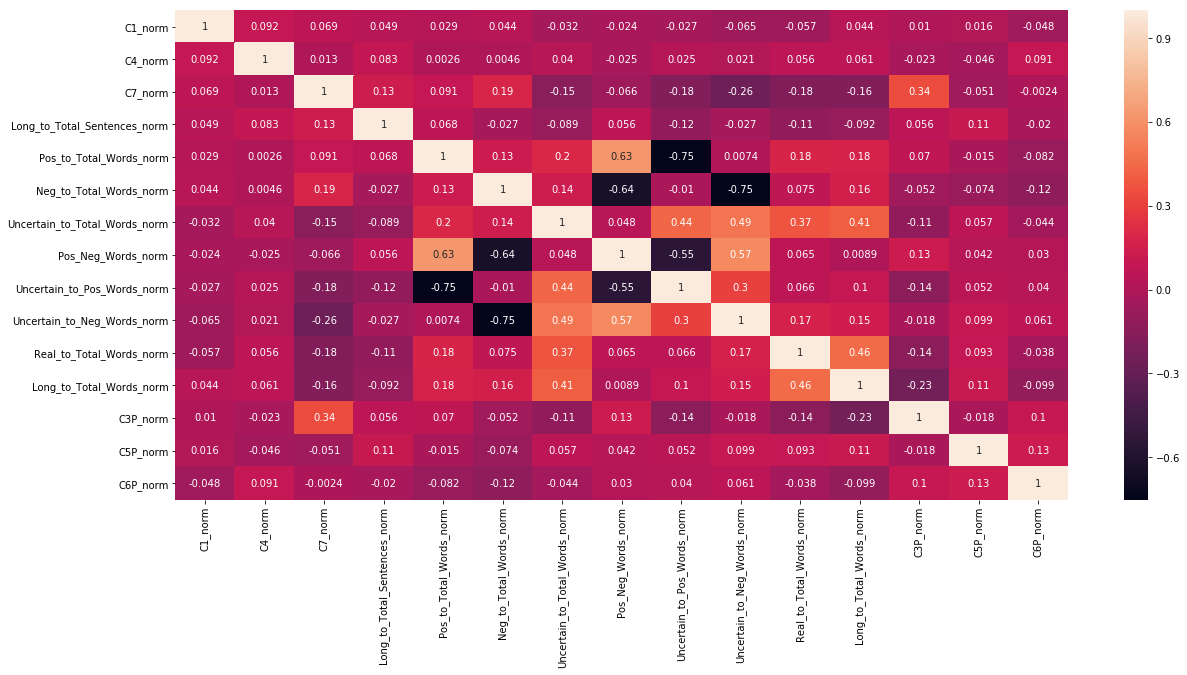

In [149]:
# evaluates ranked variables or ordinal
# used if we have not normalized first
# Add Corr with functions
spearman =normalized_df_copy.corr(method ='spearman')
pl.figure(figsize=(20,9))
sns.heatmap(spearman, annot=True)

In [150]:
#Conclusion 
#In light of the above, we have decided to exclude the following variables:

# Pos_Neg_Words_norm, which has sizeable intercorrlations with Neg_to_Total_Words_norm (-), Uncertain_to_Pos_Words_norm (-)
#    Pos_to_Total_Words_norm (+) and Uncertain_to_Negative_Words_norm (+)

# Uncertain_to_Pos_Words_norm, which has sizeable intercorrlations with Pos_to_Total_Words_norm (-), Uncertain_to_Total_Words_norm (+),
#    Pos_Neg_Words_norm (-), Uncertain_to_Neg_Words_norm (+)

# Uncertain_to_Neg_Words_norm, which has sizeable intercorrlations with Neg_to_Total_Words_norm (-), Pos_Neg_Words_norm (+),
#    Uncertain_to_Total_Words_norm (+), Uncertain_to_Pos_Words_norm (+)
# Note: C6P_norm needs to be removed from Y1 becasue duplicative

In [151]:
#Removing the variables noted above

post_corr_list = normalized_df.columns.tolist()
normalized_df_copy.drop(normalized_df_copy.columns[[7,8,9]], axis=1, inplace=True)
normalized_df_copy

,C1_norm,C4_norm,C7_norm,Long_to_Total_Sentences_norm,Pos_to_Total_Words_norm,Neg_to_Total_Words_norm,Uncertain_to_Total_Words_norm,Real_to_Total_Words_norm,Long_to_Total_Words_norm,C3P_norm,C5P_norm,C6P_norm
0,0.128561,0.671152,-0.580255,0.169230,-0.106115,0.208265,-0.201435,0.559291,0.309510,0.942972,0.059070,1.317286
1,1.655713,-0.649765,-0.918712,0.230803,-1.306342,0.817525,-0.222091,-0.024214,-0.107703,-1.060477,1.868188,-0.757306
2,-0.416945,0.410889,-1.372977,0.117878,1.944280,-0.993496,-0.016648,0.588934,1.407745,-1.060477,-0.248109,-0.757306
3,1.214407,0.389348,-1.329764,-1.264698,1.944280,-0.588021,0.730451,1.101944,1.388182,-1.060477,-0.293752,-0.757306
4,-0.617033,-1.320500,1.593986,-0.584969,-0.332305,0.491498,-0.071834,-0.512809,-0.523488,0.942972,-0.023571,0.832474
...,...,...,...,...,...,...,...,...,...,...,...,...
677,1.655713,-0.088679,0.310200,-0.225740,0.770539,-0.259475,0.586694,1.382660,-0.223521,-1.060477,0.117330,1.672757
678,-0.268583,1.593192,-0.926849,0.265288,0.010575,0.182149,0.421813,0.397455,0.677960,-1.060477,0.508230,-0.757306
679,-0.029258,0.713216,-0.537296,0.273593,-0.555185,0.154076,-0.592247,-0.463924,-0.607392,0.942972,-0.055711,-0.757306
680,-0.659305,0.771095,-0.050119,1.172383,0.891811,-1.482795,1.039045,0.592802,-1.308734,0.942972,0.261297,1.672757


# Adding back the categorical variables

In [152]:
normalized_df_copy[categorical_list] = df_impute_copy.loc[:,categorical_list]
normalized_df_copy

,C1_norm,C4_norm,C7_norm,Long_to_Total_Sentences_norm,Pos_to_Total_Words_norm,Neg_to_Total_Words_norm,Uncertain_to_Total_Words_norm,Real_to_Total_Words_norm,Long_to_Total_Words_norm,C3P_norm,C5P_norm,C6P_norm,C2,I1,I2,I3,Y1,Y2
0,0.128561,0.671152,-0.580255,0.169230,-0.106115,0.208265,-0.201435,0.559291,0.309510,0.942972,0.059070,1.317286,1.0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,0,1
1,1.655713,-0.649765,-0.918712,0.230803,-1.306342,0.817525,-0.222091,-0.024214,-0.107703,-1.060477,1.868188,-0.757306,0.0,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,1,0
2,-0.416945,0.410889,-1.372977,0.117878,1.944280,-0.993496,-0.016648,0.588934,1.407745,-1.060477,-0.248109,-0.757306,1.0,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,1,0
3,1.214407,0.389348,-1.329764,-1.264698,1.944280,-0.588021,0.730451,1.101944,1.388182,-1.060477,-0.293752,-0.757306,1.0,ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,1,1
4,-0.617033,-1.320500,1.593986,-0.584969,-0.332305,0.491498,-0.071834,-0.512809,-0.523488,0.942972,-0.023571,0.832474,1.0,ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,1.655713,-0.088679,0.310200,-0.225740,0.770539,-0.259475,0.586694,1.382660,-0.223521,-1.060477,0.117330,1.672757,1.0,ZIP,ZIPCAR INC,7514.0,0,1
678,-0.268583,1.593192,-0.926849,0.265288,0.010575,0.182149,0.421813,0.397455,0.677960,-1.060477,0.508230,-0.757306,1.0,ZLTQ,Zeltiq Aesthetics Inc,3845.0,1,1
679,-0.029258,0.713216,-0.537296,0.273593,-0.555185,0.154076,-0.592247,-0.463924,-0.607392,0.942972,-0.055711,-0.757306,0.0,ZSTN,"ZST Digital Networks, Inc.",3663.0,0,0
680,-0.659305,0.771095,-0.050119,1.172383,0.891811,-1.482795,1.039045,0.592802,-1.308734,0.942972,0.261297,1.672757,1.0,ZUMZ,Zumiez Inc,5600.0,0,0


In [153]:
# # evaluates ranked variables or ordinal
# # used if we have not normalized first
# # prefered in small samples or if there are outliers
# # more accurate than spearman
# kendall = norm_df.corr(method ='kendall')
# sns.heatmap(kendall, annot=True)

In [154]:
# # used to evaluate continuous variables
# # is prefered for our dataset
# # need to normalize before we calcualte
# pearson = norm_df.corr(method ='pearson')
# sns.heatmap(pearson, annot=True)

# Binning Code from Tao

In [155]:
normalized_df_copy.dtypes

C1_norm                           float64
C4_norm                           float64
C7_norm                           float64
Long_to_Total_Sentences_norm      float64
Pos_to_Total_Words_norm           float64
Neg_to_Total_Words_norm           float64
Uncertain_to_Total_Words_norm     float64
Real_to_Total_Words_norm          float64
Long_to_Total_Words_norm          float64
C3P_norm                          float64
C5P_norm                          float64
C6P_norm                          float64
C2                               category
I1                                 object
I2                                 object
I3                                float64
Y1                                 object
Y2                                 object
dtype: object

In [156]:
# normalized_df_copy['I3']= normalized_df_copy['I3'].astype('float')
# #df_copy['C2'] = df_copy['C2'].astype('category')
# normalized_df_copy.dtypes

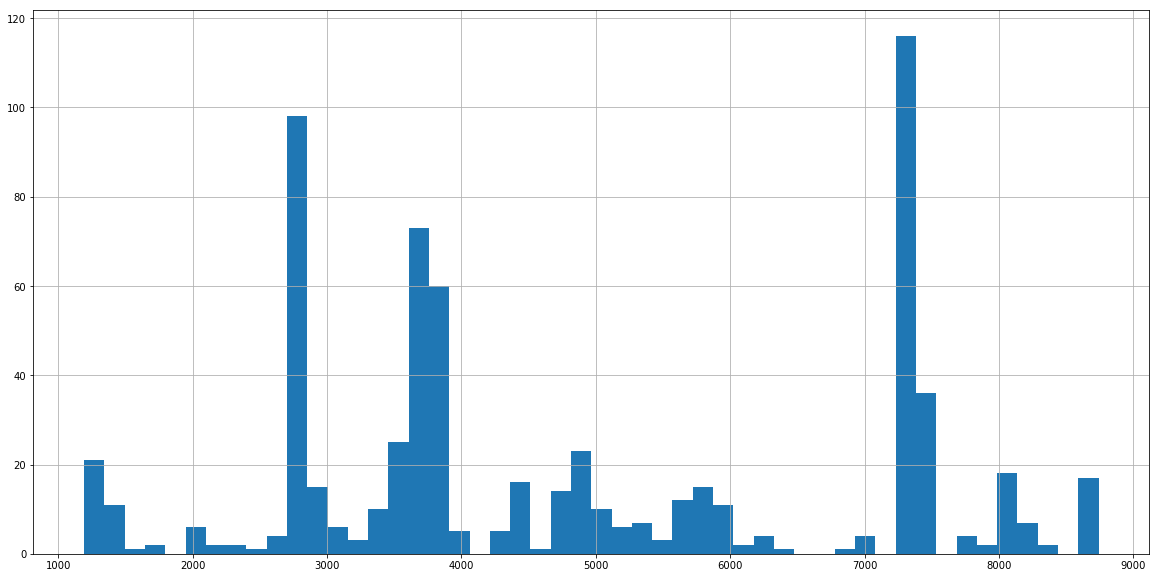

In [157]:
#Prepare a histogram of SIC Codes to visualize if binning might make sense
normalized_hist=normalized_df_copy.iloc[:,-3]
# normalized_hist.plot.hist(bins=50)
normalized_hist.hist(bins=50,figsize=(20,10))

In [158]:
#Note: See here: https://www.brookings.edu/wp-content/uploads/2016/06/specialization.pdf - "High Tech" companies are: SIC 357x, 36xx, 38xx, 737x
#Thus, we are going to bin as "High Tech" (using those 4 SIC codes) and "Non-High Tech" (using all other)

In [159]:
# #Creating Bins for ploting and understanding of the target 

# ## Binning for "High Tech" vs. "Non-High Tech"

def high_tech_bins(H):
    if (H >= 3570 and H < 3580) | (H >= 3600 and H < 3700) | (H >= 3800 and H < 3900) | (H >= 7370 and H < 7380):   # Creating a bin value of 1 for SICs in High Tech
        return(1)
    else:
        return(0)        #Creating a bin value of 0 for all others
   
normalized_df_copy['I3_tech'] = normalized_df_copy['I3'].apply(high_tech_bins)  # Creating a new column high_tech_bins in the dataframe

normalized_df_copy.head()

,C1_norm,C4_norm,C7_norm,Long_to_Total_Sentences_norm,Pos_to_Total_Words_norm,Neg_to_Total_Words_norm,Uncertain_to_Total_Words_norm,Real_to_Total_Words_norm,Long_to_Total_Words_norm,C3P_norm,C5P_norm,C6P_norm,C2,I1,I2,I3,Y1,Y2,I3_tech
0,0.128561,0.671152,-0.580255,0.169230,-0.106115,0.208265,-0.201435,0.559291,0.309510,0.942972,0.059070,1.317286,1.0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,0,1,1
1,1.655713,-0.649765,-0.918712,0.230803,-1.306342,0.817525,-0.222091,-0.024214,-0.107703,-1.060477,1.868188,-0.757306,0.0,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,1,0,0
2,-0.416945,0.410889,-1.372977,0.117878,1.944280,-0.993496,-0.016648,0.588934,1.407745,-1.060477,-0.248109,-0.757306,1.0,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,1,0,0
3,1.214407,0.389348,-1.329764,-1.264698,1.944280,-0.588021,0.730451,1.101944,1.388182,-1.060477,-0.293752,-0.757306,1.0,ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,1,1,0
4,-0.617033,-1.320500,1.593986,-0.584969,-0.332305,0.491498,-0.071834,-0.512809,-0.523488,0.942972,-0.023571,0.832474,1.0,ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,0,1,0


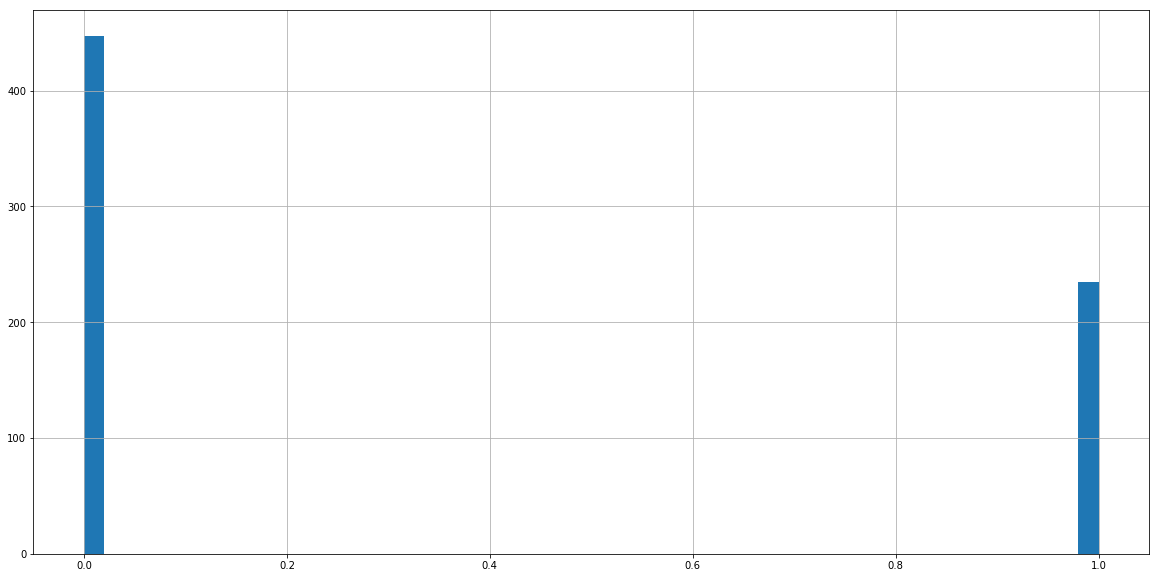

In [160]:
normalized_hist=normalized_df_copy.iloc[:,-1]
normalized_hist.hist(bins=50,figsize=(20,10))

In [161]:
#BINNING FOR MANUFACTURING VS SERVICES VS OTHER
#Note: See here: https://www.naics.com/sic-codes-industry-drilldown/ 
#Manufacturing --> SIC 20xx-3999; Services --> SIC 70xx-8999
#Thus, we are going to bin as "Manufacturing" (using SIC codes 20xx-3999),
#"Servies" (using SIC codes 70xx-8999) and "Other" (using all other)

In [162]:
# #Creating Bins for ploting and understanding of the target 

# ## Binning for "Manufacturing", "Service" and "Other"

def mfg_svc_other_bins(M):
    if (M >= 2000 and M < 4000):   # Creating a bin value of 1 for SICs in Manufacturing
        return(1)
    if (M >= 7000 and M < 9000):   # Creating a bin value of 2 for SICs in Service
        return(2)
    else:
        return(0)   # Creating a bin value of 0 for all others

normalized_df_copy['I3_mfg'] = normalized_df_copy['I3'].apply(mfg_svc_other_bins)  # Creating a new column mfg_svc_other_bins in the dataframe

normalized_df_copy.tail()

,C1_norm,C4_norm,C7_norm,Long_to_Total_Sentences_norm,Pos_to_Total_Words_norm,Neg_to_Total_Words_norm,Uncertain_to_Total_Words_norm,Real_to_Total_Words_norm,Long_to_Total_Words_norm,C3P_norm,C5P_norm,C6P_norm,C2,I1,I2,I3,Y1,Y2,I3_tech,I3_mfg
677,1.655713,-0.088679,0.310200,-0.225740,0.770539,-0.259475,0.586694,1.382660,-0.223521,-1.060477,0.117330,1.672757,1.0,ZIP,ZIPCAR INC,7514.0,0,1,0,2
678,-0.268583,1.593192,-0.926849,0.265288,0.010575,0.182149,0.421813,0.397455,0.677960,-1.060477,0.508230,-0.757306,1.0,ZLTQ,Zeltiq Aesthetics Inc,3845.0,1,1,1,1
679,-0.029258,0.713216,-0.537296,0.273593,-0.555185,0.154076,-0.592247,-0.463924,-0.607392,0.942972,-0.055711,-0.757306,0.0,ZSTN,"ZST Digital Networks, Inc.",3663.0,0,0,1,1
680,-0.659305,0.771095,-0.050119,1.172383,0.891811,-1.482795,1.039045,0.592802,-1.308734,0.942972,0.261297,1.672757,1.0,ZUMZ,Zumiez Inc,5600.0,0,0,0,0
681,1.655713,0.534566,1.653354,0.599967,1.440324,0.079311,0.820820,0.283275,0.352759,0.942972,-0.333216,0.992473,1.0,ZZ,SEALY CORP,2510.0,0,0,0,1


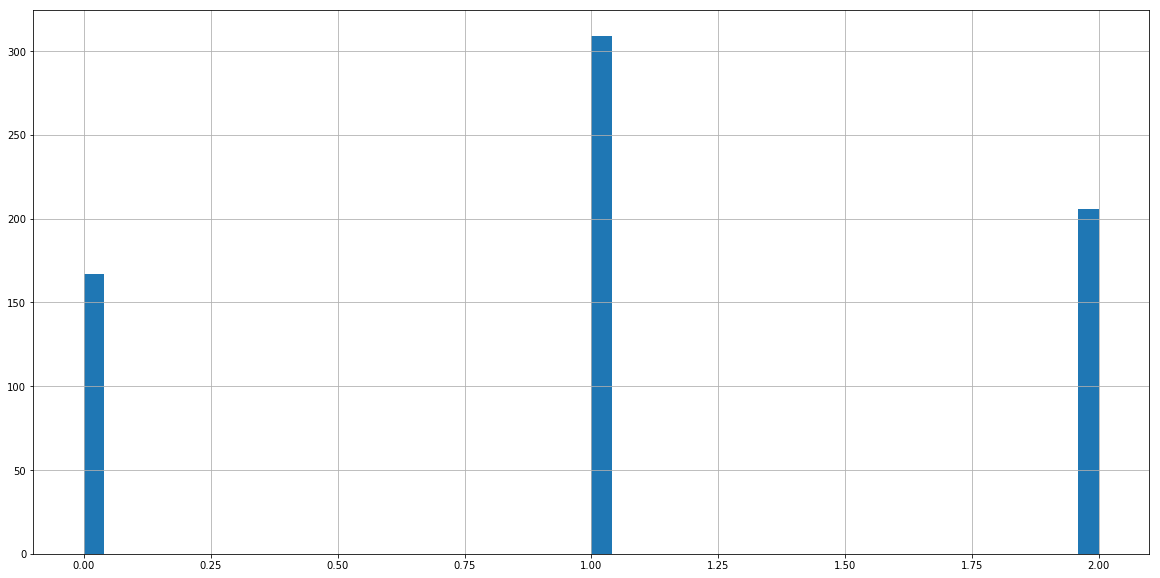

In [163]:
normalized_hist=normalized_df_copy.iloc[:,-1]
# normalized_hist.plot.hist(bins=50)
normalized_hist.hist(bins=50,figsize=(20,10))

# Feature Selection to reduce the columns
    * Split SIC Code to possibly use for feature engeneering near the end
  *  https://towardsdatascience.com/feature-selection-using-wrapper-methods-in-python-f0d352b346f

In [164]:
#DWM NOTE: I'M NOT SURE WHERE TO PUT THIS IN THE NOTEBOOK - SO I'M PUTTING IT HERE - 

#Start by checking the datatypes for the df variables
normalized_df_copy.dtypes


C1_norm                           float64
C4_norm                           float64
C7_norm                           float64
Long_to_Total_Sentences_norm      float64
Pos_to_Total_Words_norm           float64
Neg_to_Total_Words_norm           float64
Uncertain_to_Total_Words_norm     float64
Real_to_Total_Words_norm          float64
Long_to_Total_Words_norm          float64
C3P_norm                          float64
C5P_norm                          float64
C6P_norm                          float64
C2                               category
I1                                 object
I2                                 object
I3                                float64
Y1                                 object
Y2                                 object
I3_tech                             int64
I3_mfg                              int64
dtype: object

In [165]:
#Need to change C2, Y1 and Y2 to floats

# normalized_df_copy["C2"] = pd.to_numeric(normalized_df_copy["C2"])
# normalized_df_copy["Y1"] = pd.to_numeric(normalized_df_copy["Y1"])
# normalized_df_copy["Y2"] = pd.to_numeric(normalized_df_copy["Y2"])

normalized_df_copy = normalized_df_copy.astype({"C2": float, "Y1": float, "Y2": float, "I3_tech": float, "I3_mfg": float})

#re-check on datatypes:
normalized_df_copy.dtypes

C1_norm                          float64
C4_norm                          float64
C7_norm                          float64
Long_to_Total_Sentences_norm     float64
Pos_to_Total_Words_norm          float64
Neg_to_Total_Words_norm          float64
Uncertain_to_Total_Words_norm    float64
Real_to_Total_Words_norm         float64
Long_to_Total_Words_norm         float64
C3P_norm                         float64
C5P_norm                         float64
C6P_norm                         float64
C2                               float64
I1                                object
I2                                object
I3                               float64
Y1                               float64
Y2                               float64
I3_tech                          float64
I3_mfg                           float64
dtype: object

In [166]:
#### Check to see if any features are highly correlated with Y1...like we did in the Baseball Proj1, Pt2
normalized_df_copy.corr()['Y1']

C1_norm                          0.039249
C4_norm                         -0.076646
C7_norm                         -0.044219
Long_to_Total_Sentences_norm     0.069523
Pos_to_Total_Words_norm          0.094833
Neg_to_Total_Words_norm          0.178333
Uncertain_to_Total_Words_norm    0.069717
Real_to_Total_Words_norm         0.113273
Long_to_Total_Words_norm         0.124939
C3P_norm                        -0.083833
C5P_norm                        -0.064503
C6P_norm                        -0.777564
C2                              -0.062170
I3                              -0.086128
Y1                               1.000000
Y2                              -0.227029
I3_tech                         -0.071614
I3_mfg                          -0.011994
Name: Y1, dtype: float64

In [167]:
#### Sort Y1 correlations - highest to lowest
abs(normalized_df_copy.corr()['Y1']).sort_values(ascending=False).index

Index(['Y1', 'C6P_norm', 'Y2', 'Neg_to_Total_Words_norm',
       'Long_to_Total_Words_norm', 'Real_to_Total_Words_norm',
       'Pos_to_Total_Words_norm', 'I3', 'C3P_norm', 'C4_norm', 'I3_tech',
       'Uncertain_to_Total_Words_norm', 'Long_to_Total_Sentences_norm',
       'C5P_norm', 'C2', 'C7_norm', 'C1_norm', 'I3_mfg'],
      dtype='object')

In [168]:
#### Check to see if any features are highly correlated with Y2...like we did in the Baseball Proj1, Pt2
normalized_df_copy.corr()['Y2']

C1_norm                         -0.001876
C4_norm                          0.089251
C7_norm                         -0.057521
Long_to_Total_Sentences_norm     0.003323
Pos_to_Total_Words_norm         -0.045650
Neg_to_Total_Words_norm         -0.110225
Uncertain_to_Total_Words_norm    0.035175
Real_to_Total_Words_norm        -0.020407
Long_to_Total_Words_norm        -0.006310
C3P_norm                         0.018811
C5P_norm                         0.082269
C6P_norm                         0.237323
C2                               0.069761
I3                               0.105977
Y1                              -0.227029
Y2                               1.000000
I3_tech                          0.132479
I3_mfg                           0.128712
Name: Y2, dtype: float64

In [169]:
#### Sort Y2 correlations - highest to lowest
abs(normalized_df_copy.corr()['Y2']).sort_values(ascending=False).index

Index(['Y2', 'C6P_norm', 'Y1', 'I3_tech', 'I3_mfg', 'Neg_to_Total_Words_norm',
       'I3', 'C4_norm', 'C5P_norm', 'C2', 'C7_norm', 'Pos_to_Total_Words_norm',
       'Uncertain_to_Total_Words_norm', 'Real_to_Total_Words_norm', 'C3P_norm',
       'Long_to_Total_Words_norm', 'Long_to_Total_Sentences_norm', 'C1_norm'],
      dtype='object')

In [170]:
# #Conclusion: the top common correlated variables (not including the Y-variables) are:
# #For Y1
# 'C6P_norm' - reminder: needs to be removed as duplicitive of Y1
# 'Neg_to_Total_Words_norm'
# 'Long_to_Total_Words_norm'
# 'Pos_to_Total_Words_norm'
# 'Real_to_Total_Words_norm'
# 'I3'
# 'C3P_norm'
# 'Uncertain_to_Total_Words_norm'
# 'C1_norm'
# 'I3_tech'
# 'Long_to_Total_Sentences_norm'
# 'C4_norm'
# 'C2'
# 'C7_norm'
# 'C5P_norm'
# 'I3_mfg'

# #For Y2
# 'C6P_norm'
# 'Y1'
# 'I3_tech'
# 'I3_mfg'
# 'I3'
# 'C4_norm'
# 'Neg_to_Total_Words_norm'
# 'C2'
# 'Uncertain_to_Total_Words_norm'
# 'Pos_to_Total_Words_norm'
# 'C7_norm'
# 'C1_norm'
# 'Long_to_Total_Words_norm'
# 'C3P_norm'
# 'C5P_norm'
# 'Real_to_Total_Words_norm'
# 'Long_to_Total_Sentences_norm'

In [171]:
#WE NEED TO MAKE FOUR SEPARATE dfs:
# 1. Y1_df_mfg = C1_norm to C2, I3_tech - Remove C6P_norm
# 2. Y1_df_tech = c1_norm to C2, I3_mfg - Remove C6P_norm 
# 3. Y2_df_mfg = C1_norm to C2, Y1, I3_tech
# 4. Y2_df_tech = c1_norm to C2, Y1, I3_mfg

In [172]:
#Making Y1_df_mfg dataframe:
Y1_df_mfg = normalized_df_copy.loc[:,['Neg_to_Total_Words_norm','Long_to_Total_Words_norm','Pos_to_Total_Words_norm','Real_to_Total_Words_norm','C3P_norm',
                                       'Uncertain_to_Total_Words_norm','C1_norm','Long_to_Total_Sentences_norm','C4_norm','C2','C7_norm','C5P_norm','I3_mfg','Y2','Y1']]
Y1_df_mfg

,Neg_to_Total_Words_norm,Long_to_Total_Words_norm,Pos_to_Total_Words_norm,Real_to_Total_Words_norm,C3P_norm,Uncertain_to_Total_Words_norm,C1_norm,Long_to_Total_Sentences_norm,C4_norm,C2,C7_norm,C5P_norm,I3_mfg,Y2,Y1
0,0.208265,0.309510,-0.106115,0.559291,0.942972,-0.201435,0.128561,0.169230,0.671152,1.0,-0.580255,0.059070,1.0,1.0,0.0
1,0.817525,-0.107703,-1.306342,-0.024214,-1.060477,-0.222091,1.655713,0.230803,-0.649765,0.0,-0.918712,1.868188,1.0,0.0,1.0
2,-0.993496,1.407745,1.944280,0.588934,-1.060477,-0.016648,-0.416945,0.117878,0.410889,1.0,-1.372977,-0.248109,1.0,0.0,1.0
3,-0.588021,1.388182,1.944280,1.101944,-1.060477,0.730451,1.214407,-1.264698,0.389348,1.0,-1.329764,-0.293752,1.0,1.0,1.0
4,0.491498,-0.523488,-0.332305,-0.512809,0.942972,-0.071834,-0.617033,-0.584969,-1.320500,1.0,1.593986,-0.023571,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,-0.259475,-0.223521,0.770539,1.382660,-1.060477,0.586694,1.655713,-0.225740,-0.088679,1.0,0.310200,0.117330,2.0,1.0,0.0
678,0.182149,0.677960,0.010575,0.397455,-1.060477,0.421813,-0.268583,0.265288,1.593192,1.0,-0.926849,0.508230,1.0,1.0,1.0
679,0.154076,-0.607392,-0.555185,-0.463924,0.942972,-0.592247,-0.029258,0.273593,0.713216,0.0,-0.537296,-0.055711,1.0,0.0,0.0
680,-1.482795,-1.308734,0.891811,0.592802,0.942972,1.039045,-0.659305,1.172383,0.771095,1.0,-0.050119,0.261297,0.0,0.0,0.0


In [173]:
#Making Y1_df_tech dataframe:
Y1_df_tech = normalized_df_copy.loc[:,['Neg_to_Total_Words_norm','Long_to_Total_Words_norm','Pos_to_Total_Words_norm','Real_to_Total_Words_norm','C3P_norm',
                                       'Uncertain_to_Total_Words_norm','C1_norm','I3_tech','Long_to_Total_Sentences_norm','C4_norm','C2','C7_norm','C5P_norm','Y2','Y1']]
Y1_df_tech

,Neg_to_Total_Words_norm,Long_to_Total_Words_norm,Pos_to_Total_Words_norm,Real_to_Total_Words_norm,C3P_norm,Uncertain_to_Total_Words_norm,C1_norm,I3_tech,Long_to_Total_Sentences_norm,C4_norm,C2,C7_norm,C5P_norm,Y2,Y1
0,0.208265,0.309510,-0.106115,0.559291,0.942972,-0.201435,0.128561,1.0,0.169230,0.671152,1.0,-0.580255,0.059070,1.0,0.0
1,0.817525,-0.107703,-1.306342,-0.024214,-1.060477,-0.222091,1.655713,0.0,0.230803,-0.649765,0.0,-0.918712,1.868188,0.0,1.0
2,-0.993496,1.407745,1.944280,0.588934,-1.060477,-0.016648,-0.416945,0.0,0.117878,0.410889,1.0,-1.372977,-0.248109,0.0,1.0
3,-0.588021,1.388182,1.944280,1.101944,-1.060477,0.730451,1.214407,0.0,-1.264698,0.389348,1.0,-1.329764,-0.293752,1.0,1.0
4,0.491498,-0.523488,-0.332305,-0.512809,0.942972,-0.071834,-0.617033,0.0,-0.584969,-1.320500,1.0,1.593986,-0.023571,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,-0.259475,-0.223521,0.770539,1.382660,-1.060477,0.586694,1.655713,0.0,-0.225740,-0.088679,1.0,0.310200,0.117330,1.0,0.0
678,0.182149,0.677960,0.010575,0.397455,-1.060477,0.421813,-0.268583,1.0,0.265288,1.593192,1.0,-0.926849,0.508230,1.0,1.0
679,0.154076,-0.607392,-0.555185,-0.463924,0.942972,-0.592247,-0.029258,1.0,0.273593,0.713216,0.0,-0.537296,-0.055711,0.0,0.0
680,-1.482795,-1.308734,0.891811,0.592802,0.942972,1.039045,-0.659305,0.0,1.172383,0.771095,1.0,-0.050119,0.261297,0.0,0.0


In [174]:
#Making Y2_df_mfg dataframe:
Y2_df_mfg = normalized_df_copy.loc[:,['C6P_norm','I3_mfg','C4_norm','Neg_to_Total_Words_norm','C2','Uncertain_to_Total_Words_norm','Pos_to_Total_Words_norm',
                                      'C7_norm','C1_norm','Long_to_Total_Words_norm','C3P_norm','C5P_norm','Real_to_Total_Words_norm','Long_to_Total_Sentences_norm','Y1','Y2']]
Y2_df_mfg

,C6P_norm,I3_mfg,C4_norm,Neg_to_Total_Words_norm,C2,Uncertain_to_Total_Words_norm,Pos_to_Total_Words_norm,C7_norm,C1_norm,Long_to_Total_Words_norm,C3P_norm,C5P_norm,Real_to_Total_Words_norm,Long_to_Total_Sentences_norm,Y1,Y2
0,1.317286,1.0,0.671152,0.208265,1.0,-0.201435,-0.106115,-0.580255,0.128561,0.309510,0.942972,0.059070,0.559291,0.169230,0.0,1.0
1,-0.757306,1.0,-0.649765,0.817525,0.0,-0.222091,-1.306342,-0.918712,1.655713,-0.107703,-1.060477,1.868188,-0.024214,0.230803,1.0,0.0
2,-0.757306,1.0,0.410889,-0.993496,1.0,-0.016648,1.944280,-1.372977,-0.416945,1.407745,-1.060477,-0.248109,0.588934,0.117878,1.0,0.0
3,-0.757306,1.0,0.389348,-0.588021,1.0,0.730451,1.944280,-1.329764,1.214407,1.388182,-1.060477,-0.293752,1.101944,-1.264698,1.0,1.0
4,0.832474,0.0,-1.320500,0.491498,1.0,-0.071834,-0.332305,1.593986,-0.617033,-0.523488,0.942972,-0.023571,-0.512809,-0.584969,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,1.672757,2.0,-0.088679,-0.259475,1.0,0.586694,0.770539,0.310200,1.655713,-0.223521,-1.060477,0.117330,1.382660,-0.225740,0.0,1.0
678,-0.757306,1.0,1.593192,0.182149,1.0,0.421813,0.010575,-0.926849,-0.268583,0.677960,-1.060477,0.508230,0.397455,0.265288,1.0,1.0
679,-0.757306,1.0,0.713216,0.154076,0.0,-0.592247,-0.555185,-0.537296,-0.029258,-0.607392,0.942972,-0.055711,-0.463924,0.273593,0.0,0.0
680,1.672757,0.0,0.771095,-1.482795,1.0,1.039045,0.891811,-0.050119,-0.659305,-1.308734,0.942972,0.261297,0.592802,1.172383,0.0,0.0


In [175]:
#Making Y2_df_tech dataframe:
Y2_df_tech = normalized_df_copy.loc[:,['C6P_norm','I3_tech','C4_norm','Neg_to_Total_Words_norm','C2','Uncertain_to_Total_Words_norm','Pos_to_Total_Words_norm',
                                      'C7_norm','C1_norm','Long_to_Total_Words_norm','C3P_norm','C5P_norm','Real_to_Total_Words_norm','Long_to_Total_Sentences_norm','Y1','Y2']]
Y2_df_tech

,C6P_norm,I3_tech,C4_norm,Neg_to_Total_Words_norm,C2,Uncertain_to_Total_Words_norm,Pos_to_Total_Words_norm,C7_norm,C1_norm,Long_to_Total_Words_norm,C3P_norm,C5P_norm,Real_to_Total_Words_norm,Long_to_Total_Sentences_norm,Y1,Y2
0,1.317286,1.0,0.671152,0.208265,1.0,-0.201435,-0.106115,-0.580255,0.128561,0.309510,0.942972,0.059070,0.559291,0.169230,0.0,1.0
1,-0.757306,0.0,-0.649765,0.817525,0.0,-0.222091,-1.306342,-0.918712,1.655713,-0.107703,-1.060477,1.868188,-0.024214,0.230803,1.0,0.0
2,-0.757306,0.0,0.410889,-0.993496,1.0,-0.016648,1.944280,-1.372977,-0.416945,1.407745,-1.060477,-0.248109,0.588934,0.117878,1.0,0.0
3,-0.757306,0.0,0.389348,-0.588021,1.0,0.730451,1.944280,-1.329764,1.214407,1.388182,-1.060477,-0.293752,1.101944,-1.264698,1.0,1.0
4,0.832474,0.0,-1.320500,0.491498,1.0,-0.071834,-0.332305,1.593986,-0.617033,-0.523488,0.942972,-0.023571,-0.512809,-0.584969,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,1.672757,0.0,-0.088679,-0.259475,1.0,0.586694,0.770539,0.310200,1.655713,-0.223521,-1.060477,0.117330,1.382660,-0.225740,0.0,1.0
678,-0.757306,1.0,1.593192,0.182149,1.0,0.421813,0.010575,-0.926849,-0.268583,0.677960,-1.060477,0.508230,0.397455,0.265288,1.0,1.0
679,-0.757306,1.0,0.713216,0.154076,0.0,-0.592247,-0.555185,-0.537296,-0.029258,-0.607392,0.942972,-0.055711,-0.463924,0.273593,0.0,0.0
680,1.672757,0.0,0.771095,-1.482795,1.0,1.039045,0.891811,-0.050119,-0.659305,-1.308734,0.942972,0.261297,0.592802,1.172383,0.0,0.0


In [176]:
#DETERMINING FEATURE IMPORTANCE BEGINS HERE

# # Import the necessary libraries first
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [177]:
#FIRST MODEL IS FOR Y1_df_mfg:

array = Y1_df_mfg.values
X = array[:,:13] #features
Y = array[:,-1] #target

# Feature extraction using RFE
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 5
Selected Features: [ True  True False False False False False  True  True  True False False
 False]
Feature Ranking: [1 1 5 2 4 9 7 1 1 1 6 3 8]


In [178]:
#Conclusion: for Y1_df_mfg - top 5 features are: 
#'Neg_to_Total_Words_norm','Pos_to_Total_Words_norm','Real_to_Total_Words_norm','Long_to_Total_Sentences_norm','C2',

In [179]:
#SECOND MODEL IS FOR Y1_df_tech:

array = Y1_df_tech.values
X = array[:,:13] #features
Y = array[:,-1] #target

# Feature extraction using RFE
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 5
Selected Features: [ True  True False False False False False  True  True False  True False
 False]
Feature Ranking: [1 1 7 4 6 9 8 1 1 2 1 3 5]


In [180]:
#Conclusion: for Y1_df_tech - top 5 features are: 
#'Neg_to_Total_Words_norm','Long_to_Total_Words_norm','Pos_to_Total_Words_norm','Long_to_Total_Sentences_norm','C7_norm'

In [181]:
#THIRD MODEL IS FOR Y2_df_mfg:

array = Y2_df_mfg.values
X = array[:,:14] #features
Y = array[:,-1] #target

# Feature extraction using RFE
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 5
Selected Features: [ True  True  True  True  True False False False False False False False
 False False]
Feature Ranking: [ 1  1  1  1  1  2  5  4 10  7  8  6  3  9]


In [182]:
#Conclusion for Y2_df_mfg - top 5 features are: 
#'C6P_norm','I3_mfg','C4_norm','C2','Uncertain_to_Total_Words_norm'

In [183]:
#FOURTH MODEL IS FOR Y2_df_tech:

array = Y2_df_tech.values
X = array[:,:14] #features
Y = array[:,-1] #target

# Feature extraction using RFE
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 5
Selected Features: [ True  True  True  True  True False False False False False False False
 False False]
Feature Ranking: [ 1  1  1  1  1  2  6  4  8  9  7  5  3 10]


In [184]:
#Conclusion for Y2_df_tech - top 5 features are: 
#'C6P_norm','I3_tech','C4_norm','C2','Uncertain_to_Total_Words_norm'

In [185]:
Y1_df_mfg[['Neg_to_Total_Words_norm','Pos_to_Total_Words_norm','Real_to_Total_Words_norm','Long_to_Total_Sentences_norm','C2','Y2','Y1']].to_csv("Y1_df_mfg.csv",index=False)


In [186]:
Y1_df_tech[['Neg_to_Total_Words_norm','Long_to_Total_Words_norm','Pos_to_Total_Words_norm','Long_to_Total_Sentences_norm','C7_norm','Y2','Y1']].to_csv("Y1_df_tech.csv",index=False)


In [187]:
Y2_df_mfg[['C6P_norm','I3_mfg','C4_norm','C2','Uncertain_to_Total_Words_norm','Y1','Y2']].to_csv("Y2_df.csv",index=False)

# Export to CSV to be evaluated

In [188]:
# from openpyxl.workbook import Workbook
# normalized_df_copy.to_csv("output_eval_mid.csv",index=False)

In [189]:
#col_list_inverse = df_impute_copy.iloc[:,[0,1,2,3,8,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72]].columns.tolist()
#col_list_sqrt
#col_list_log
#col_list_inverse

# Example Evaluation Code

This notebook will be very __similar__ to the code I use to evaluate your results - it is provided for __your convenience__ so that you can use it to evaluate your preprocessing results at any time before your __final submission__.

Please note that the results here will __NOT__ be the same as my evaluation results.

Let's start with loading the required packages.

In [190]:
# import required package for data handling
import pandas as pd
import numpy as np

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression

Next you should load __your__ data. In this case, I am using a sample dataset (`GroupX.csv`) which contains 6 predictors (`X1 - X6`) and two target variables (`Y1, Y2`).

Please make sure you change the data to your __OWN__ dataset when using this code.

__NOTE__:
1. Your dataset maybe very different from the sample dataset.
2. Please follow this structure when submitting your dataset.

In [191]:
data = pd.read_csv('Y1_df_mfg.csv', header=0)
data.head()

,Neg_to_Total_Words_norm,Pos_to_Total_Words_norm,Real_to_Total_Words_norm,Long_to_Total_Sentences_norm,C2,Y2,Y1
0,0.208265,-0.106115,0.559291,0.169230,1.0,1.0,0.0
1,0.817525,-1.306342,-0.024214,0.230803,0.0,0.0,1.0
2,-0.993496,1.944280,0.588934,0.117878,1.0,0.0,1.0
3,-0.588021,1.944280,1.101944,-1.264698,1.0,1.0,1.0
4,0.491498,-0.332305,-0.512809,-0.584969,1.0,1.0,0.0


Checking your data types and make sure it follows the data dictionary would be an important step, you can do that using the `.dtypes` attribute.

__NOTE__: all __continuous__ faetures will be in `float64` data type, and all __categorical__ features will be in `int64` data type (given you already coded (per __suggest task \#6__ in the competition document) them).

In [192]:
data.dtypes

Neg_to_Total_Words_norm         float64
Pos_to_Total_Words_norm         float64
Real_to_Total_Words_norm        float64
Long_to_Total_Sentences_norm    float64
C2                              float64
Y2                              float64
Y1                              float64
dtype: object

Now you need to specify your targets and predictors. __NOTE__ we have two targets here (`Y1, Y2`).

In [193]:
y1 = data.Y1
y2 = data.Y2

Check the shape of the data.

In [194]:
data.shape

(682, 7)

It is very possible that you will use different sets of the predictors for `Y1` and `Y2`. Now let's define them.

First, let's define predictors for `Y1` - which will be the first 5 features in `data`.

In [195]:
cols = list(data.columns)
# first 5 features 
cols[:-2]

['Neg_to_Total_Words_norm',
 'Pos_to_Total_Words_norm',
 'Real_to_Total_Words_norm',
 'Long_to_Total_Sentences_norm',
 'C2']

Use below code to select the first 5 features as predictors for `Y1`.

In [196]:
predictors_y1 = data[cols[:-2]]
predictors_y1.head()

,Neg_to_Total_Words_norm,Pos_to_Total_Words_norm,Real_to_Total_Words_norm,Long_to_Total_Sentences_norm,C2
0,0.208265,-0.106115,0.559291,0.169230,1.0
1,0.817525,-1.306342,-0.024214,0.230803,0.0
2,-0.993496,1.944280,0.588934,0.117878,1.0
3,-0.588021,1.944280,1.101944,-1.264698,1.0
4,0.491498,-0.332305,-0.512809,-0.584969,1.0


Upon investigation of the data, we know we have __six__ features (`X1 - X6`) predicting `Y2`. Use similar code (as below) to select them.

In [197]:
predictors_y2 = data[cols[:-2]]
predictors_y2.head()

,Neg_to_Total_Words_norm,Pos_to_Total_Words_norm,Real_to_Total_Words_norm,Long_to_Total_Sentences_norm,C2
0,0.208265,-0.106115,0.559291,0.169230,1.0
1,0.817525,-1.306342,-0.024214,0.230803,0.0
2,-0.993496,1.944280,0.588934,0.117878,1.0
3,-0.588021,1.944280,1.101944,-1.264698,1.0
4,0.491498,-0.332305,-0.512809,-0.584969,1.0


Below is the key part of this notebook - which generates a `logistic regression` model to predict `Y1`/`Y2`.

The code works this way:

1. We generate two lists `f1_score_lst` and `auc_lst` to store f1_score and AUC from each of the `10` runs of the model;
2. Define model:
    1. We define a `LogisticRegression()` model;
    
    2. We split predictors (`predictors_y1`) and target `y1` to training (80%) and testing (20%);
    
    3. We fit the model `clf` to the training data, then use it to predict on the testing data;
    
    4. We also defined a `10-fold cross validation` to make sure our model do not overfit - see [here](https://scikit-learn.org/stable/modules/cross_validation.html) for more info;
    
    5. We append the f1_score and AUC of current model to the lists (`f1_score_lst` and `auc_lst`) we defined earlier.
  
3. Print out average f1_score and AUC for all 10 runs;
4. Print out average average accuracy from cross validation
5. Print out confusion matrix and classification report for the __last__ model.

__NOTE__: Step 3 provides the evaluation results we need; step 4 - 5 can be used to verify the results from step 3.

In [198]:
# lists for f1-score and AUC
f1_score_lst = []
auc_lst = []


#loop to calculate f1 and auc scores and present averages after 10 runs
for count in range (1,10):
    #Model building
    clf = LogisticRegression()
    X1_train, X1_test, y1_train, y1_test = train_test_split(predictors_y1, y1, test_size=0.2, random_state=123)
    clf.fit(X1_train, y1_train)

    y1_pred = clf.predict(X1_test)

    
    #10-fold cross validation
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    scoring = 'accuracy'
    results = model_selection.cross_val_score(clf, X1_train, y1_train, cv=kfold, scoring=scoring)

    

    
    #calculate f1-score and AUC
    
    clf_roc_auc = roc_auc_score(y1_test, y1_pred)
    f1_score_lst.append(precision_recall_fscore_support(y1_test, y1_pred, average='weighted')[2])
    auc_lst.append(clf_roc_auc)


print('F1 {:.4f}; AUC {:.4f} '.format(np.mean(f1_score_lst),np.mean(auc_lst)))

#result=logit_model.fit()
confusion_matrix_y1 = confusion_matrix(y1_test, y1_pred)


#print(result.summary())
print('Accuracy of classifier on test set: {:.2f}'.format(clf.score(X1_test, y1_test)))

print("10-fold cross validation average accuracy of classifier: %.3f" % (results.mean()))

print('Confusion Matrix for Logistic Regression Classfier:')
print(confusion_matrix_y1)

print('Classification Report for Logistic Regression Classfier:')
print(classification_report(y1_test, y1_pred))


/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is Fal

F1 0.5964; AUC 0.5949 
Accuracy of classifier on test set: 0.60
10-fold cross validation average accuracy of classifier: 0.606
Confusion Matrix for Logistic Regression Classfier:
[[34 31]
 [24 48]]
Classification Report for Logistic Regression Classfier:
              precision    recall  f1-score   support

         0.0       0.59      0.52      0.55        65
         1.0       0.61      0.67      0.64        72

    accuracy                           0.60       137
   macro avg       0.60      0.59      0.59       137
weighted avg       0.60      0.60      0.60       137



/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Below code are used to evaluate model toward `Y2`. It is very similar to the code above - key difference is that `Y2` is imbalanced - so I wrote some code (under `# Begin oversampling`) to deal with that.

In [199]:
# lists for f1-score and AUC
f1_score_lst = []
auc_lst = []


#loop to calculate f1 and auc scores and present averages after 10 runs
for count in range (1,10):
    #Model building
    clf1 = LogisticRegression()

    
    # Splitting data into testing and training
    X2_train, X2_test, y2_train, y2_test = train_test_split(predictors_y2, y2, test_size=0.2, random_state=123)
    
    # Begin oversampling
    oversample = pd.concat([X2_train,y2_train],axis=1)
    max_size = oversample['Y2'].value_counts().max()
    lst = [oversample]
    for class_index, group in oversample.groupby('Y2'):
        lst.append(group.sample(max_size-len(group), replace=True))
    X2_train = pd.concat(lst)
    y2_train=pd.DataFrame.copy(X2_train['Y2'])
    del X2_train['Y2']
    
    # fitting model on oversampled data
    clf1.fit(X2_train, y2_train)
    
    y2_pred = clf1.predict(X2_test)
    
    
    #10-fold cross validation
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    scoring = 'accuracy'
    results = model_selection.cross_val_score(clf1, X2_train, y2_train, cv=kfold, scoring=scoring)
    
    #calculate f1-score and AUC
    
    clf1_roc_auc = roc_auc_score(y2_test, y2_pred)
    
    
    #calculate average f1-score and AUC
    f1_score_lst.append(precision_recall_fscore_support(y2_test, y2_pred, average='weighted')[2])
    auc_lst.append(clf1_roc_auc)
    
    
print('F1 {:.4f}; AUC {:.4f} '.format(np.mean(f1_score_lst),np.mean(auc_lst)))

confusion_matrix_y2 = confusion_matrix(y2_test, y2_pred)


print('Accuracy of classifier on test set: {:.3f}'.format(clf1.score(X2_test, y2_test)))

print("10-fold cross validation average accuracy of clf1: %.3f" % (results.mean()))

print('Confusion Matrix for Classfier:')
print(confusion_matrix_y2)

print('Classification Report for Classfier:')
print(classification_report(y2_test, y2_pred))


/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is Fal

F1 0.5753; AUC 0.5497 
Accuracy of classifier on test set: 0.555
10-fold cross validation average accuracy of clf1: 0.431
Confusion Matrix for Classfier:
[[21 23]
 [38 55]]
Classification Report for Classfier:
              precision    recall  f1-score   support

         0.0       0.36      0.48      0.41        44
         1.0       0.71      0.59      0.64        93

    accuracy                           0.55       137
   macro avg       0.53      0.53      0.53       137
weighted avg       0.59      0.55      0.57       137



# TEH END (All code below is the sandbox)

In [ ]:
#df_copy['I3'].str.split(n=4)

In [ ]:
#use histogram to visualize the # of observations for IPO prices
df_impute_copy['P(IPO)'].hist (bins=20)
#use histogram to visualize the # of observations for IPO 1Day prices
df_impute_copy['P(1Day)'].hist (bins=20)

In [ ]:
#for feature in col_list: 
 #   print(plt.pyplot.hist(df_copy[feature], bins=10,range=[0,40]))


In [ ]:
#plt.pyplot.hist(df_copy[col_list], bins=10, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, data=None)

In [ ]:
#To filter out only continuous columns
#float_cols = col_list
#replacement = df_copy.loc[:,float_cols]
#print(replacement)

In [ ]:
#sm.qqplot(df_copy['C7'])

In [ ]:
#box_plot = plt.figure(figsize=(4,3))
#ax1 = box_plot.add_subplot(1,1,1)
#ax1.boxplot(
    # first argument is the data
    # since we are plotting over two pieces of data
    # we have to put each piece of data into a list
    #[tips[tips.sex == 'Female']['tip'],
     #tips[tips.sex == 'Male']['tip']],
    # we can pass in optional parameter to label the data
    #labels = ['Female', 'Male'])
#ax1.set_xlabel('Sex')
#ax1.set_ylabel('Tip')
#ax1.set_title('Tips by Sex in boxplot')
#box_plot.show()

In [ ]:
# Create the random variables with mean 5, and sd 3
#x_10 = stats.norm.rvs(loc=5, scale=3, size=10)
#x_50 = stats.norm.rvs(loc=5, scale=3, size=50)
#x_100 = stats.norm.rvs(loc=5, scale=3, size=100)
#x_1000 = stats.norm.rvs(loc=5, scale=3, size=1000)# Print the p values
#print (stats.shapiro(p_df))
#print stats.shapiro(x_50)
#print stats.shapiro(x_100)
#print stats.shapiro(x_1000)
# Skew will be easier to determine the normalization df.skew()

In [ ]:
#if norm_df[feature].skew()>0.5:
 #       norm_df[norm_name] = np.cbrt(norm_df[feature]
  #  elif norm_df[feature].skew()<-0.5:
   #     norm_df[norm_name] = np.power(norm_df[feature],2)
    #else: norm_df[norm_name] = norm_df[feature]

In [ ]:
#for feature in norm_sublist:
 #   norm_name = (feature + "_norm")
  #  if norm_df[feature].skew() >0.5:
   #     norm_df[norm_name] = np.cbrt(norm_df[feature])
    #elif norm_df[feature].skew() < -0.5:
   #                             norm_df[norm_name] = np.power(norm_df[feature],2)
   # else: norm_df[norm_name] = norm_df[feature]
#norm_df 
#for feature in norm_sublist:  
 #   if norm_df[feature].skew() > 0.5:
  #      norm_df[feature] = np.cbrt(norm_df[feature]
   # elif norm_df[feature].skew() < -0.5:
    #    norm_df[feature] = np.power(norm_df[feature],2)
    #else: norm_df[feature] = norm_df[feature]

In [ ]:
#for feature in eval_list:
 #   print(df_eval_base[feature])

In [ ]:
# import required packages for splitting data
#from sklearn import model_selection
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import train_test_split

# import required packages for evaluating models
#from sklearn import metrics
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report
#rom sklearn.metrics import roc_auc_score
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import precision_recall_fscore_support
from sklearn import preprocessing

# import `logistic regression` model
#from sklearn.linear_model import LogisticRegression

In [ ]:
# # Create new normalized columns
# norm_list =[]
# for col in eval_list:
#     norm_name = col + "_norm"
#     norm_list.append(norm_name) 
# norm_list

In [ ]:
# # creating the titles for the log columns and normalizing those columns by taking the log of the original columns
# log_col_list =[]
# for col in col_list:
#     col="log_"+col
#     log_col_list.append(col)
# log_col_list
# df_impute_copy[log_col_list] = np.log(df_impute_copy[col_list])
# df_impute_copy.info()

In [ ]:
# # creating the titles for the log columns and normalizing those columns by taking the sqrt of the original columns
# sqrt_col_list =[]
# for col in col_list:
#     col="sqrt_"+col
#     sqrt_col_list.append(col)
# log_col_list
# df_impute_copy[sqrt_col_list] = np.sqrt(df_impute_copy[col_list])
# df_impute_copy.info()

In [ ]:
# # creating the titles for the log columns and normalizing those columns by taking the inverse of the original columns
# inverse_col_list =[]
# for col in col_list:
#     col="inverse_"+col
#     inverse_col_list.append(col)
# log_col_list
# df_impute_copy[inverse_col_list] = 1/(df_impute_copy[col_list])
# df_impute_copy.info()

# THE WAY FORWARD TO THE LIGHT

Prework: Handle missing data, dashes, inconsistant data, 
    
    1. Selected Imputation methods by column
       - Get code from Dawn
       - mean, median, mode
    2. Normalize
       - Code from Brian
           - Sqrt
           - Log
           - 1/X
       - Impute again for inf errors
    3. Add calculated fields (Mike to provide code)
       - Y1
       - Y2
       - C3'
       - C5'
       - C6'
    4. Correlation + Heat map from Mike
       - Pearson
       - Kendall
       - Spearman
    5. Reduce to selected independent variables
       - Use Correlation methods to eliminate Fields
       - Use Feature Importance to determine which ones to keep
       - Feature Engeneering of P/Sales ratio
       - make some fields bianary
    6. Run evaluation code

# Calculated Fields (Where we stopped)

In [ ]:
# #Create variable true_value for C6P
# # Add T1 T4/T1 S1 = S1/S2 Calcualte all the ratios for the Ts & S Colums
# true_value = ((df_alt_copy['P(IPO)'] - df_alt_copy['P(mid)']) / df_alt_copy['P(mid)'])*100

# #Create new columns
# #Add them to df_alternate_copy
# #Create P(mid) variable
# df_alt_copy['P(mid)'] = (df_alt_copy['P(H)'] + df_alt_copy['P(L)']) / 2
# df_alt_copy['C3P'] = np.where(df_alt_copy['C3'] > 0, '1', '0')
# df_alt_copy['C5P'] = df_alt_copy['C5'] / df_alt_copy['C6']
# df_alt_copy['C6P'] = np.where(df_alt_copy['P(IPO)'] > df_alt_copy['P(mid)'], true_value, '0')
# df_alt_copy['Y1'] = np.where(df_alt_copy['P(IPO)'] < df_alt_copy['P(mid)'], '1', '0')
# df_alt_copy['Y2'] = np.where(df_alt_copy['P(IPO)'] < df_alt_copy['P(1Day)'], '1', '0')




# #if df_alt_copy['P(IPO)'] > df_alt_copy['P(mid)']:
#     #df_alt_copy['C6P'] = ((df_alt_copy['P(IPO)'] - df_alt_copy['P(mid)']) / df_alt_copy['P(mid)'])*100 
# #else :
#     #df_alt_copy['C6P'] = 0

# df_alt_copy.head()

In [81]:
# normalized_df.apply(func=norm_df_outlier, axis=0)

C1_norm                            ([1.0052372512045877], [1.0086990203451112])
C3_norm                                                          ([nan], [nan])
C4_norm                         ([-0.07978998452796494], [0.09737892822443289])
C5_norm                            ([1.0226750577222266], [1.0284988863914775])
C6_norm                            ([1.0209196123986382], [1.0261371449054137])
C7_norm                            ([1.0011750820974543], [1.0126501932715828])
P(mid)_norm                         ([1.0030150285775503], [1.004708829609427])
Long_to_Total_Sentences_norm       ([0.4376077722453211], [0.8171980525933258])
Pos_to_Total_Words_norm            ([0.9910975422671495], [0.9934821064416439])
Neg_to_Total_Words_norm            ([0.9918745027667675], [0.9942291298948662])
Pos_Neg_Words_norm                   ([0.99764586898815], [1.0008030988107979])
Long_to_Total_Words_norm           ([0.9951579925714189], [0.9961753949708612])
Real_to_Total_Words_norm           ([0.9

In [ ]:
# getting the upper boundary using 3 standard deviation
# you should also get the lower boundary
# You can also set the boundaries using IQR
# u_bound = normalized_df.mean() + 3* normalized_df.std()
# print(u_bound)

In [ ]:
# detecting any values are greater than the upper boundary
# norm_df[norm_df>u_bound].count()

In [134]:
# going for all the columns
# for col in normalized_df.columns:
#     u_bound = normalized_df[col].mean() + 3* normalized_df[col].std()
#     normalized_df[col][normalized_df[col] > u_bound] = u_bound

In [ ]:
# Replace the values greater than the upper boundary with the upper boundary
# normalized_df[normalized_df>u_bound] = u_bound

In [135]:
# detecting any values are greater than the upper boundary
# normalized_df[norm_df>u_bound].count()

C1_norm                         671
C3_norm                          11
C4_norm                           0
C5_norm                         682
C6_norm                         682
C7_norm                         589
P(mid)_norm                      84
Long_to_Total_Sentences_norm      1
Pos_to_Total_Words_norm           0
Neg_to_Total_Words_norm           0
Pos_Neg_Words_norm                0
Long_to_Total_Words_norm          1
Real_to_Total_Words_norm          0
C5P_norm                          6
dtype: int64

In [373]:
# x = normalized_df_copy.shape[0]
# y = normalized_df_copy.shape[1]

In [374]:
# #z-score standardization  #I think this works
# #import package
# from scipy.stats import zscore
# #normalize
# norm_df = norm_df.apply(zscore)
# #print results
# print(norm_df.describe())

In [375]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# print(scaler.fit(normalized_df_copy))
# StandardScaler()
# print(scaler.mean_)
# print(scaler.transform(normalized_df_copy))
# print(scaler.transform(x,y))
# normalized_df_copy

In [47]:
# p_df = df_impute_copy.iloc[:,55:58]
# sns.pairplot(p_df, dropna =False)
# c_df = df_impute_copy.iloc[:,58:64]
# sns.pairplot(c_df, dropna =False,hue="C2")
# t_df = df_impute_copy.iloc[:,64:69]
# sns.pairplot(t_df, dropna =False)
# s_df = df_impute_copy.iloc[:,69:]
# sns.pairplot(s_df, dropna =False)